## FINAL noteboos for strategy

**Structure**

1. [Part 1](#part-1) - SMA
2. [Part 2](#part-2) - models
3. [Part 3](#part-3) - small portfolio
4. [Part 4](#part-4) - small portfolio + dynamic rebalancing
5. [Part 5](#part-5) - wide portfolio 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

import sys, os
sys.path.append("../src")


# part 1
from baseline import SMAConfig, run_sma
# part 2
from agents import AITradingSuite, SuiteConfig

# part 3: 
from compare_base_strategies import compare_by_trades, plot_price_with_trades

# part 4:
from dynamic_rebalance import (
    equal_weight_targets, mv_targets, bands_from_vol,
    portfolio_equity_dynamic_v3, run_dynamic_demo, brief_report
)


%config InlineBackend.figure_format = 'retina'


### Part 0. Data loading and data description part

In [2]:
# Load saved data
file_path = '../cryptos_hourly_data.csv'
global_df = pd.read_csv(file_path, parse_dates=["Open time"])
global_df = global_df.set_index("Open time")
global_df['ts'] = pd.to_datetime(global_df.index)#.floor('D')

df_single = global_df[global_df.symbol == 'BTCUSDT'].dropna()
df_single['ts'] = pd.to_datetime(df_single.index)#.floor('D')
df_single = df_single.reset_index(drop=True)


df_single = df_single.rename(columns={'Open':'open','Close':'close','High':'high','Low':'low','Volume':'volume'})[["open","high","low","close",'volume','ts','symbol']]


df_single = df_single.drop_duplicates(subset=["ts"], keep='first')
df_single.head()


open      high       low     close      volume                  ts  \
0  42558.02  42670.44  42520.72  42520.72   923.43813 2023-12-31 21:00:00   
1  42520.73  42591.10  42056.00  42257.88  1811.59411 2023-12-31 22:00:00   
2  42257.89  42345.65  42066.00  42283.58  1710.13721 2023-12-31 23:00:00   
3  42283.58  42554.57  42261.02  42475.23  1271.68108 2024-01-01 00:00:00   
4  42475.23  42775.00  42431.65  42613.56  1196.37856 2024-01-01 01:00:00   

    symbol  
0  BTCUSDT  
1  BTCUSDT  
2  BTCUSDT  
3  BTCUSDT  
4  BTCUSDT


<a id="part-1"></a>

### Part 1


**Baseline SMA stratery for one single coin**


In [11]:
global_df.symbol.unique()[:10]

array(['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BNBUSDT', 'SOLUSDT', 'USDCUSDT',
       'DOGEUSDT', 'ADAUSDT', 'TRXUSDT', 'LINKUSDT'], dtype=object)

{'ROI': 1.1638759265844443, 'Sharpe': 0.252984794656862, 'MaxDD': -0.24773641455564122, 'AnnVol': 0.057888213415741525, 'CAGR': 0.01305238554835264, 'FinalEq': 2.1638759265844443}


/Users/admin/Desktop/SoQ/CFM/Отборочный этап/HEDGE_fund/notebooks/../src/baseline.py:61: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return df.resample(rule).agg(agg).dropna(how="all")


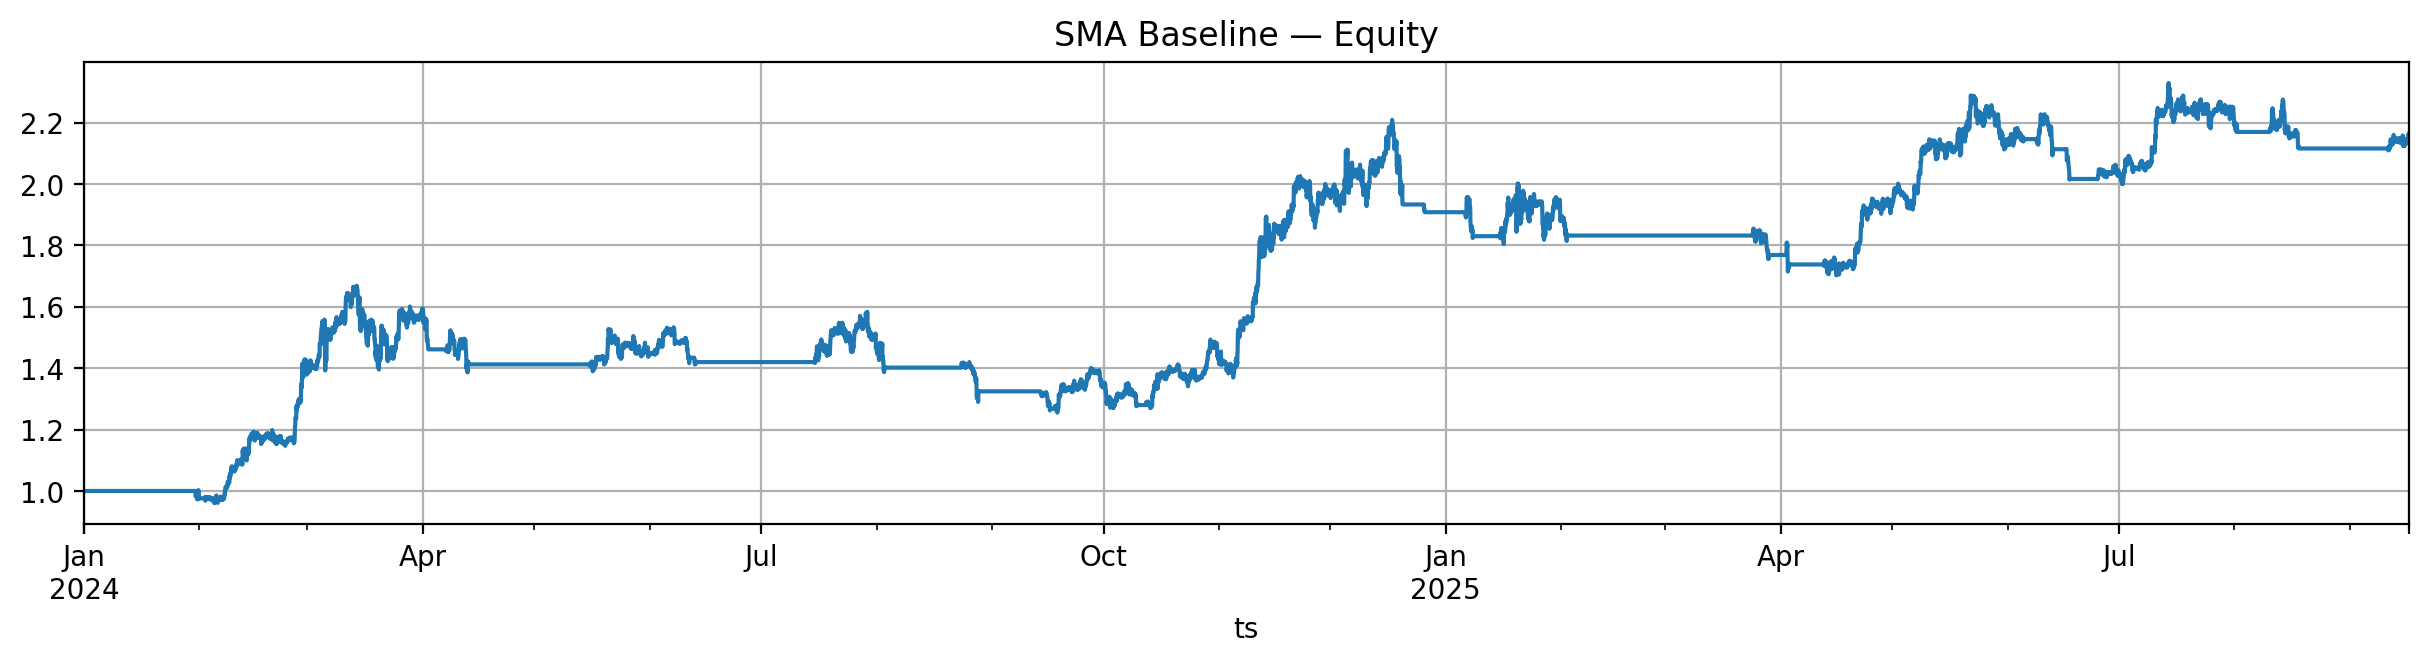

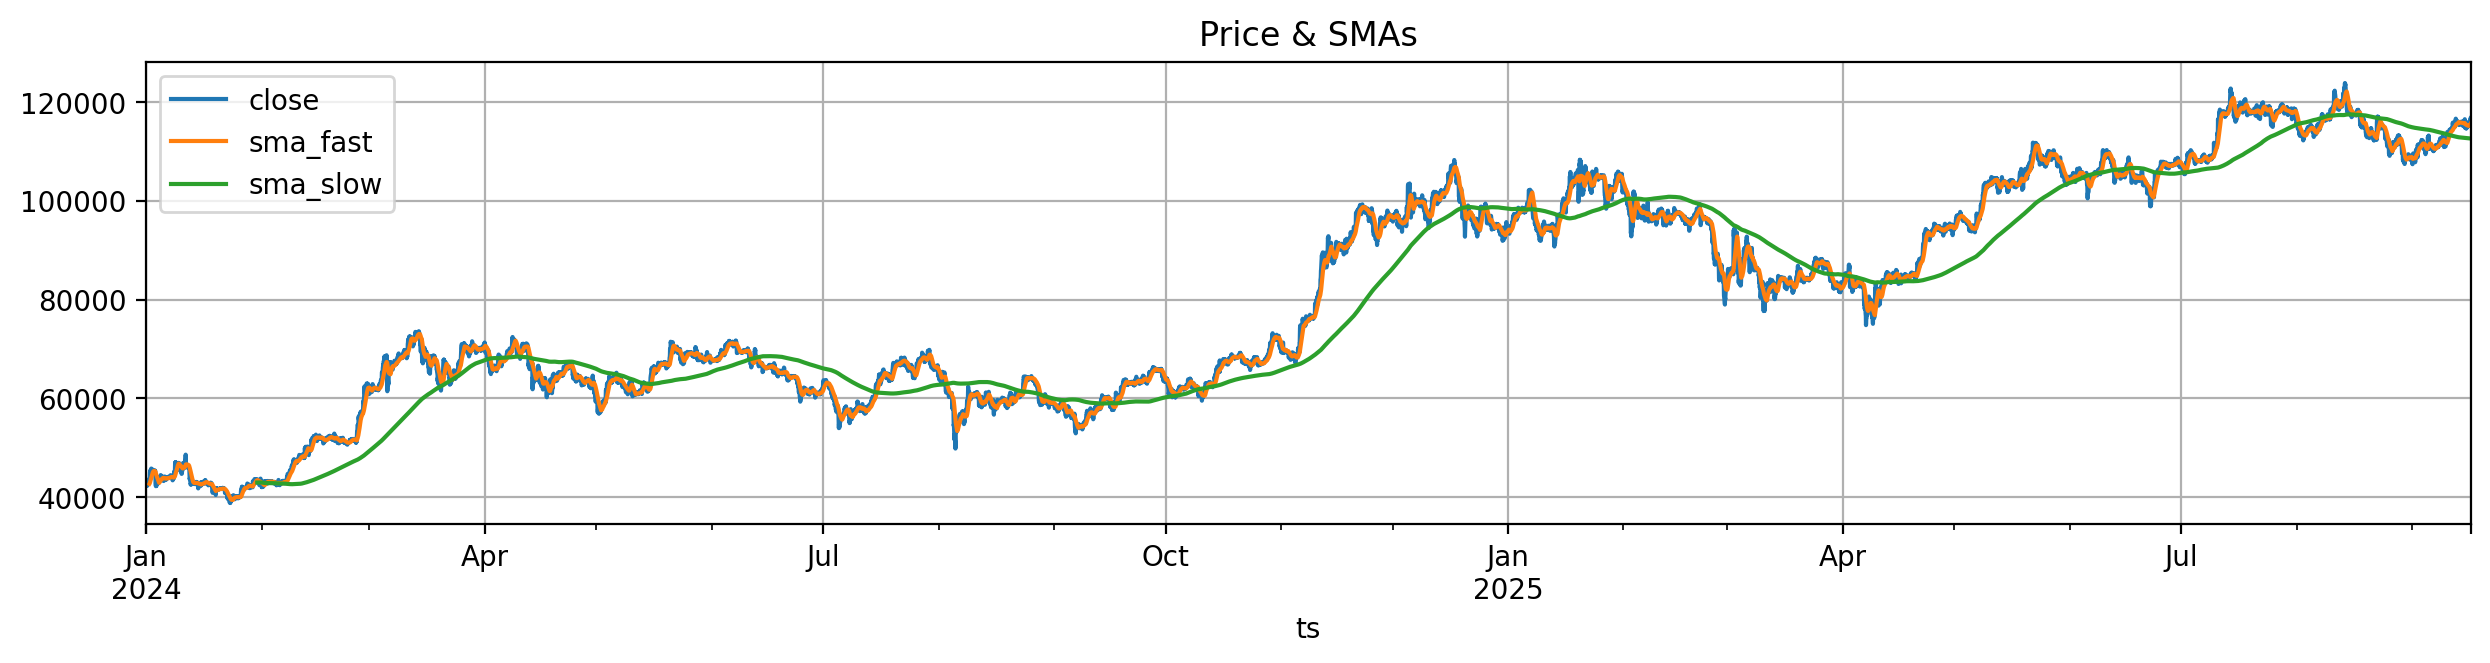

In [4]:
df_single = global_df[global_df.symbol == 'BTCUSDT'].dropna()
df_single['ts'] = pd.to_datetime(df_single.index)#.floor('D')
df_single = df_single.reset_index(drop=True)


df_single = df_single.rename(columns={'Open':'open','Close':'close','High':'high','Low':'low','Volume':'volume'})[["open","high","low","close",'volume','ts','symbol']]
df_single["target_up"] = (df_single["close"].pct_change().shift(-1) > 0).astype(int)
df_single = df_single.drop_duplicates(subset=["ts"], keep='first')



signal, equity, metrics = run_sma(
    df=df_single,
    fast=24,
    slow=24*30,#*90,
    fee_bps=5.0,
    slippage_bps=0.9,     
    resample='1H',        
    annualizer=252 #24*365    
)

print(metrics)


ax = equity.plot(figsize=(15,3), title="SMA Baseline — Equity")
ax.grid(True); plt.show()

# Цена + SMA
dfp = df_single.copy()
dfp["ts"] = pd.to_datetime(dfp["ts"])
dfp = dfp.set_index("ts").sort_index()
dfp["sma_fast"] = dfp["close"].rolling(24).mean()
dfp["sma_slow"] = dfp["close"].rolling(24*30).mean()
dfp[["close","sma_fast","sma_slow"]].plot(figsize=(15,3), title="Price & SMAs")
plt.grid(True); plt.show()


{'ROI': 1.2870685256593934, 'Sharpe': 0.18352876274916732, 'MaxDD': -0.37808647021336306, 'AnnVol': 0.10681813875481139, 'CAGR': 0.013995179026127902, 'FinalEq': 2.2870685256593934}


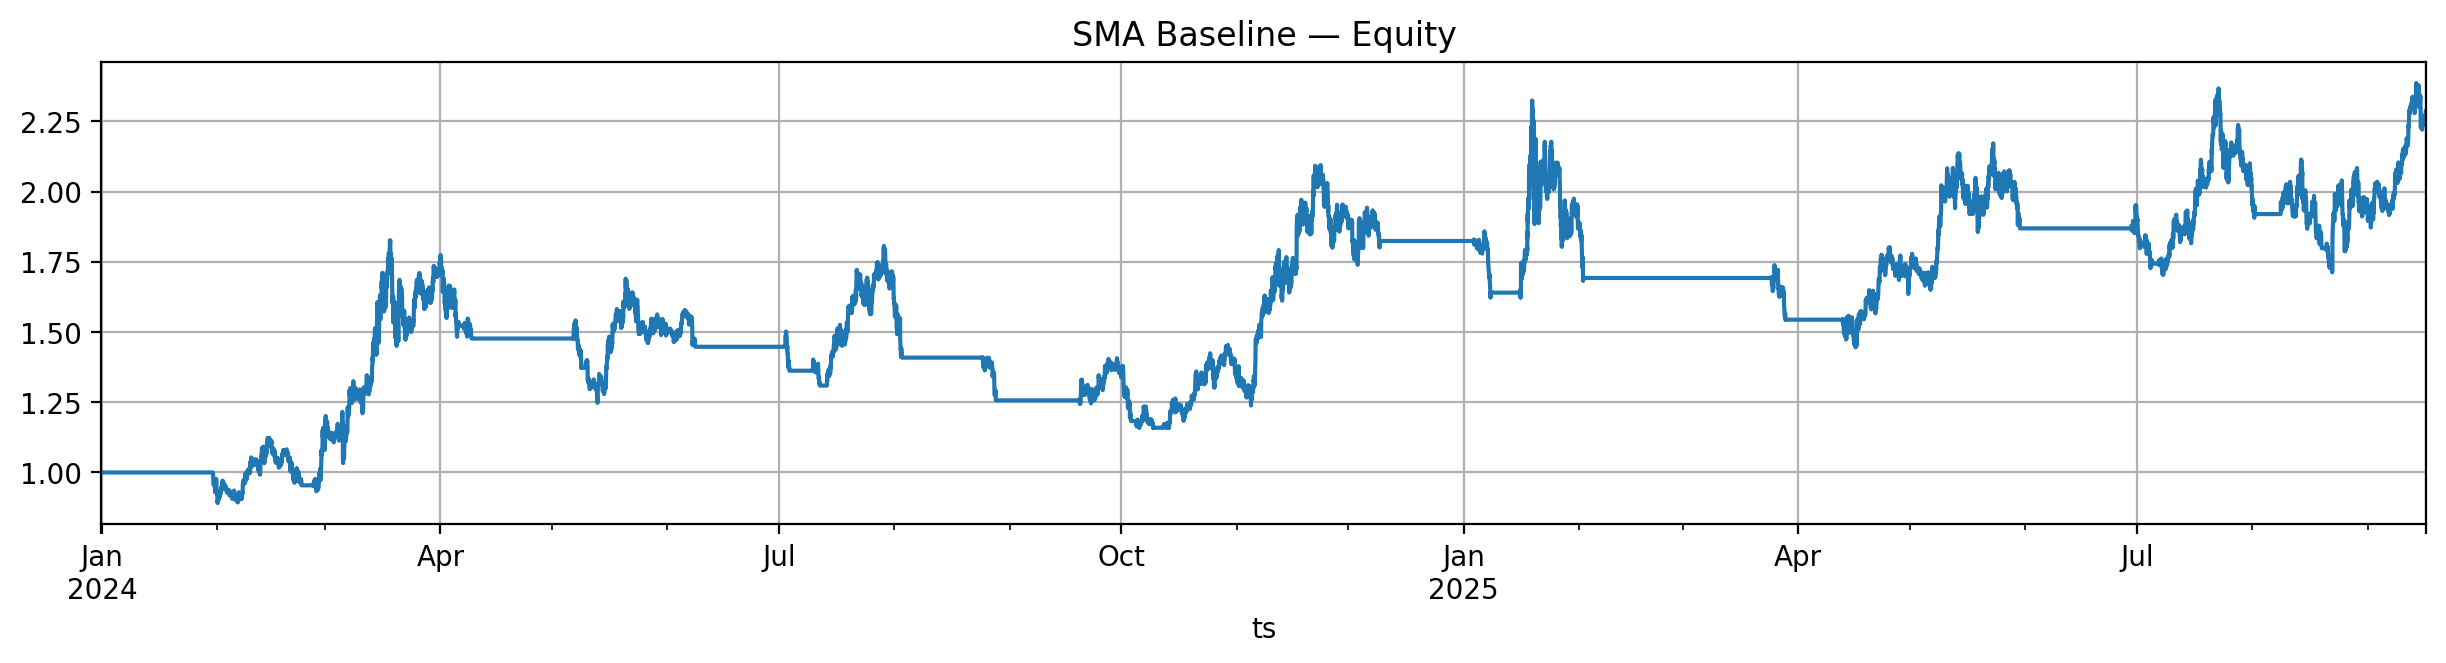

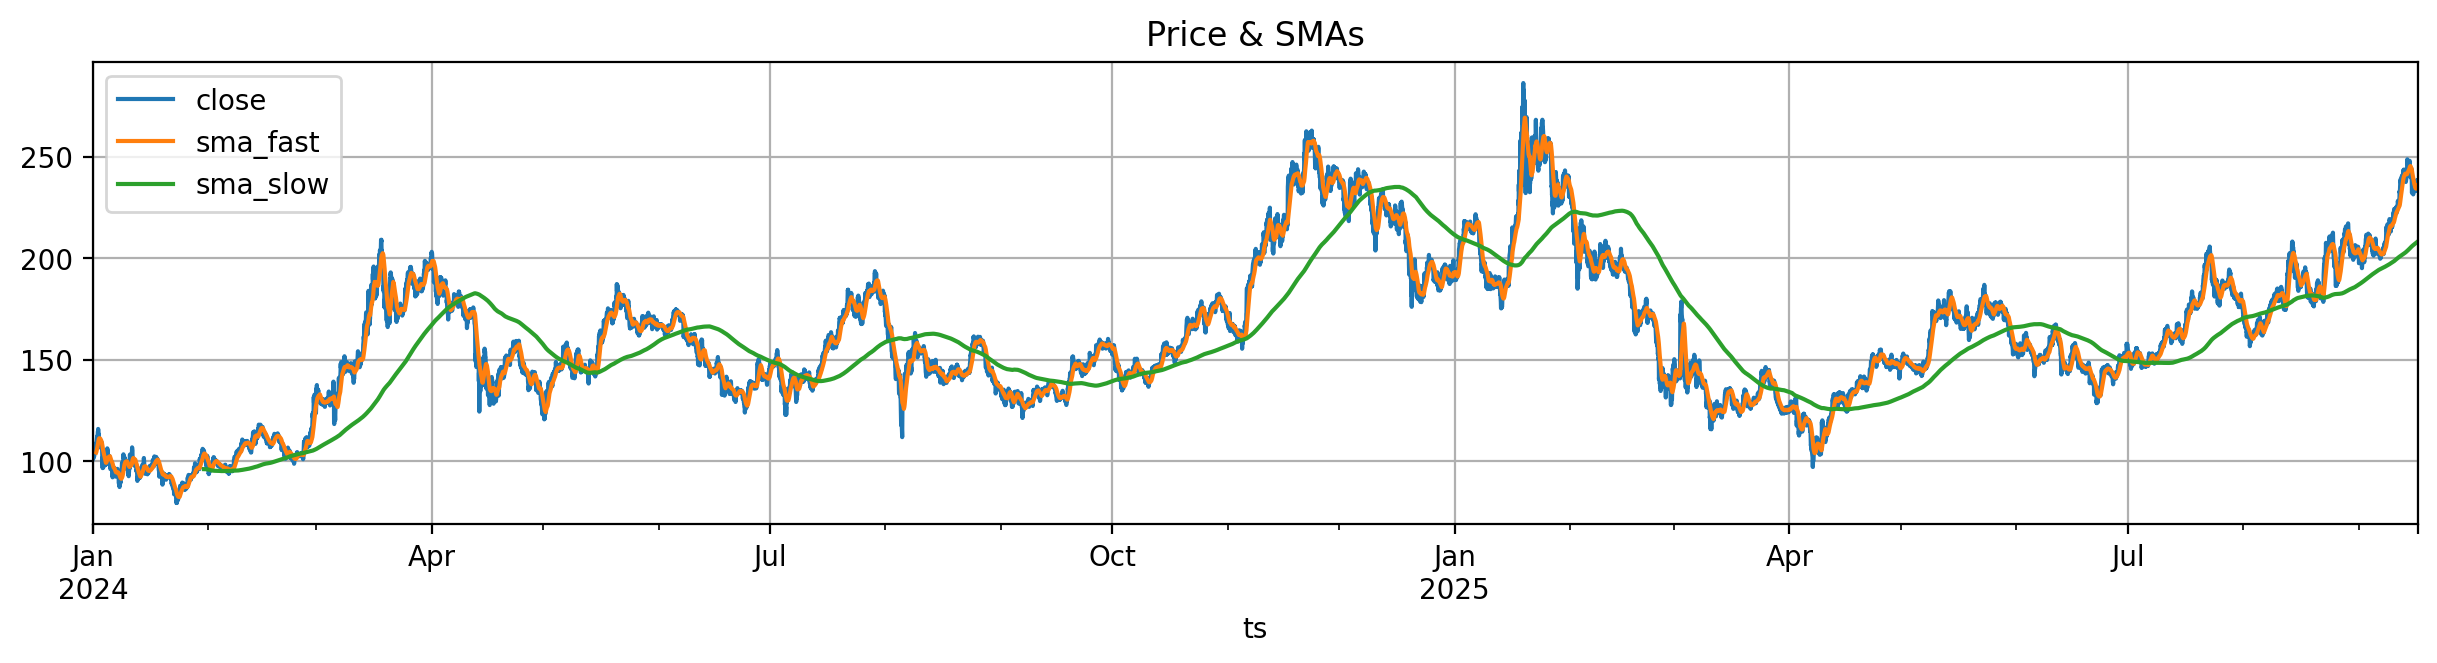

In [16]:
df_single = global_df[global_df.symbol == 'SOLUSDT'].dropna()
df_single['ts'] = pd.to_datetime(df_single.index)#.floor('D')
df_single = df_single.reset_index(drop=True)


df_single = df_single.rename(columns={'Open':'open','Close':'close','High':'high','Low':'low','Volume':'volume'})[["open","high","low","close",'volume','ts','symbol']]
df_single["target_up"] = (df_single["close"].pct_change().shift(-1) > 0).astype(int)
df_single = df_single.drop_duplicates(subset=["ts"], keep='first')



signal, equity, metrics = run_sma(
    df=df_single,
    fast=24,
    slow=24*30,#*90,
    fee_bps=5.0,
    slippage_bps=0.9,     
    resample='1H',        
    annualizer=252 #24*365 
)

print(metrics)


ax = equity.plot(figsize=(15,3), title="SMA Baseline — Equity")
ax.grid(True); plt.show()

# Цена + SMA
dfp = df_single.copy()
dfp["ts"] = pd.to_datetime(dfp["ts"])
dfp = dfp.set_index("ts").sort_index()
dfp["sma_fast"] = dfp["close"].rolling(24).mean()
dfp["sma_slow"] = dfp["close"].rolling(24*30).mean()
dfp[["close","sma_fast","sma_slow"]].plot(figsize=(15,3), title="Price & SMAs")
plt.grid(True); plt.show()


**Comments section for part 1:**

1. Additional Useful Metrics:

**Turnover** – measures trading intensity and transaction costs.

**VaR**  – quantifies tail risk and extreme loss potential.

**Hit-rate** – ratio of correct predictions to total signals.

2. Examples of AI Implementation:

- Triggers for rebalancing (reduce exposure, change weights).

- Features in ML models (volatility regimes, liquidity filters).

- Signals for aggregation (weighting or vetoing agent outputs).

3. Prediction Targets:

- Metrics themselves (volatility, drawdown) can be used as targets in forecasting models to anticipate risk and improve decision-making

<a id="part-2"></a>
### Part 2
- SMA
- ARIMA
- GARCH
- LogREg
- Boosting

*В качестве итогового таргета модели выбрана бинарная величина {0,1} - был ли рост котировки на следующий день*

In [13]:
import warnings
warnings.filterwarnings("ignore")


### Comparing for OOT data

In [18]:

import warnings
warnings.filterwarnings("ignore")
from arch.utility.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    warnings.simplefilter("ignore")




suite = AITradingSuite(df_single, SuiteConfig(fee_bps=5, slippage_bps=2, annualizer=24*365))

price = suite.df["close"]

print('Build features for models...')
suite.build_features(
    mom_windows=(24,72), vol_windows=(24,72),
    rsi_period=24, parkinson_window=24,

    # set target params
    target_horizon=24, target_thr=0.02, target_mode="cls"
    # target_horizon=6, target_thr=0.002, target_mode="cls"
)



print('Build CPD features for models...')
suite.add_cpd_features(
    on="ret1",            
    method="pelt", model="rbf",
    penalty=None,         
    metric="bic",
    min_size=12, jump=6,
    target_changes_per_year=None,  # 
    window_stat=24       
)

price = suite.df["close"]

print('SMA signals...')
sig_sma = suite.sma(fast=24, slow=24*30)
print('CPD signals...')
sig_cpd = suite.cpd_signal(cooldown=12, regime_bias_window=24, scale_by_vol=True, bias_mode="price_trend")

# --- ML с CV и подбором порога по Sharpe ---
print('LofReg signals...')
proba_log_oof, sig_log_oof, rep_log = suite.cv_logreg_strong(
    features=["mom_24h","mom_72h","vol_24h","vol_72h","parkinson_24h","rsi14","ret1","lag1","lag2","lag24","regime_id","regime_vol","regime_mean"],
    C=0.5, penalty="l2", n_splits=5, min_train_size=24*60
)

print('Boost signals...')
proba_gb_oof,  sig_gb_oof,  rep_gb  = suite.cv_boost_strong(
    features=["mom_24h","mom_72h","vol_24h","vol_72h","parkinson_24h","rsi14","ret1","lag1","lag2","lag24","regime_id","regime_vol","regime_mean"],
    n_splits=5, min_train_size=24*60
)

# --- GARCH risk-scale for SMA/CPD/ML - signal depens on vol
rs = suite.garch_risk_scaler(window_model=24*7, order=(1,1), vol_quantile=0., min_scale=0.3, max_scale=1.0)
sig_sma_rs = suite.apply_risk_scaling(sig_sma, rs)
sig_cpd_rs = suite.apply_risk_scaling(sig_cpd, rs)
sig_log_rs = suite.apply_risk_scaling(sig_log_oof, rs)
sig_gb_rs  = suite.apply_risk_scaling(sig_gb_oof, rs)

print('Ensemble signals...')
signals_pool = {
    "SMA_RS": sig_sma_rs,
    "CPD_RS": sig_cpd_rs,
    "LogReg_RS": sig_log_rs,
    "Boost_RS": sig_gb_rs
}
sig_ens_avg   = suite.ensemble(signals_pool)
sig_ens_vote  = suite.ensemble_vote_filtered(price, signals_pool, window=24*14, min_edge=0.0)
sig_ens_weight= suite.ensemble_weighted(price, signals_pool, window=24*14, method="edge_softmax", temperature=0.05)

# --- Backtest ---
eq = {
    "SMA_RS":     suite.backtest(price, sig_sma_rs),
    "CPD_RS":     suite.backtest(price, sig_cpd_rs),
    "LogReg_RS":  suite.backtest(price, sig_log_rs),
    "Boost_RS":   suite.backtest(price, sig_gb_rs),
    "ENS_AVG":    suite.backtest(price, sig_ens_avg),
    "ENS_VOTE":   suite.backtest(price, sig_ens_vote),
    "ENS_WEIGHT": suite.backtest(price, sig_ens_weight),
}
res = pd.concat({k: suite.metrics(v) for k,v in eq.items()}, axis=1).T
print(res.sort_values("Sharpe", ascending=False).round(4))


Build features for models...
Build CPD features for models...
SMA signals...
CPD signals...
LofReg signals...
Boost signals...


/Users/admin/Library/Caches/pypoetry/virtualenvs/ai-crypto-hedge-fund-IAM35a4E-py3.12/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/admin/Library/Caches/pypoetry/virtualenvs/ai-crypto-hedge-fund-IAM35a4E-py3.12/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/admin/Library/Caches/pypoetry/virtualenvs/ai-crypto-hedge-fund-IAM35a4E-py3.12/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/admin/Library/Caches/pypoetry/virtualenvs/ai-crypto-hed

Ensemble signals...
            FinalEq     ROI  Sharpe  AnnVol   MaxDD    CAGR
ENS_VOTE     1.7278  0.7278  0.8018  0.7479 -0.3970  0.3769
LogReg_RS    1.3228  0.3228  0.6548  0.3361 -0.3916  0.1778
Boost_RS     1.3176  0.3176  0.6355  0.3505 -0.3084  0.1751
ENS_WEIGHT   1.2209  0.2209  0.6263  0.2279 -0.2082  0.1238
SMA_RS       1.1954  0.1954  0.4665  0.3728 -0.3205  0.1100
ENS_AVG      1.1107  0.1107  0.4610  0.1616 -0.1368  0.0634
CPD_RS       0.2951 -0.7049 -2.3510  0.2863 -0.7307 -0.5103


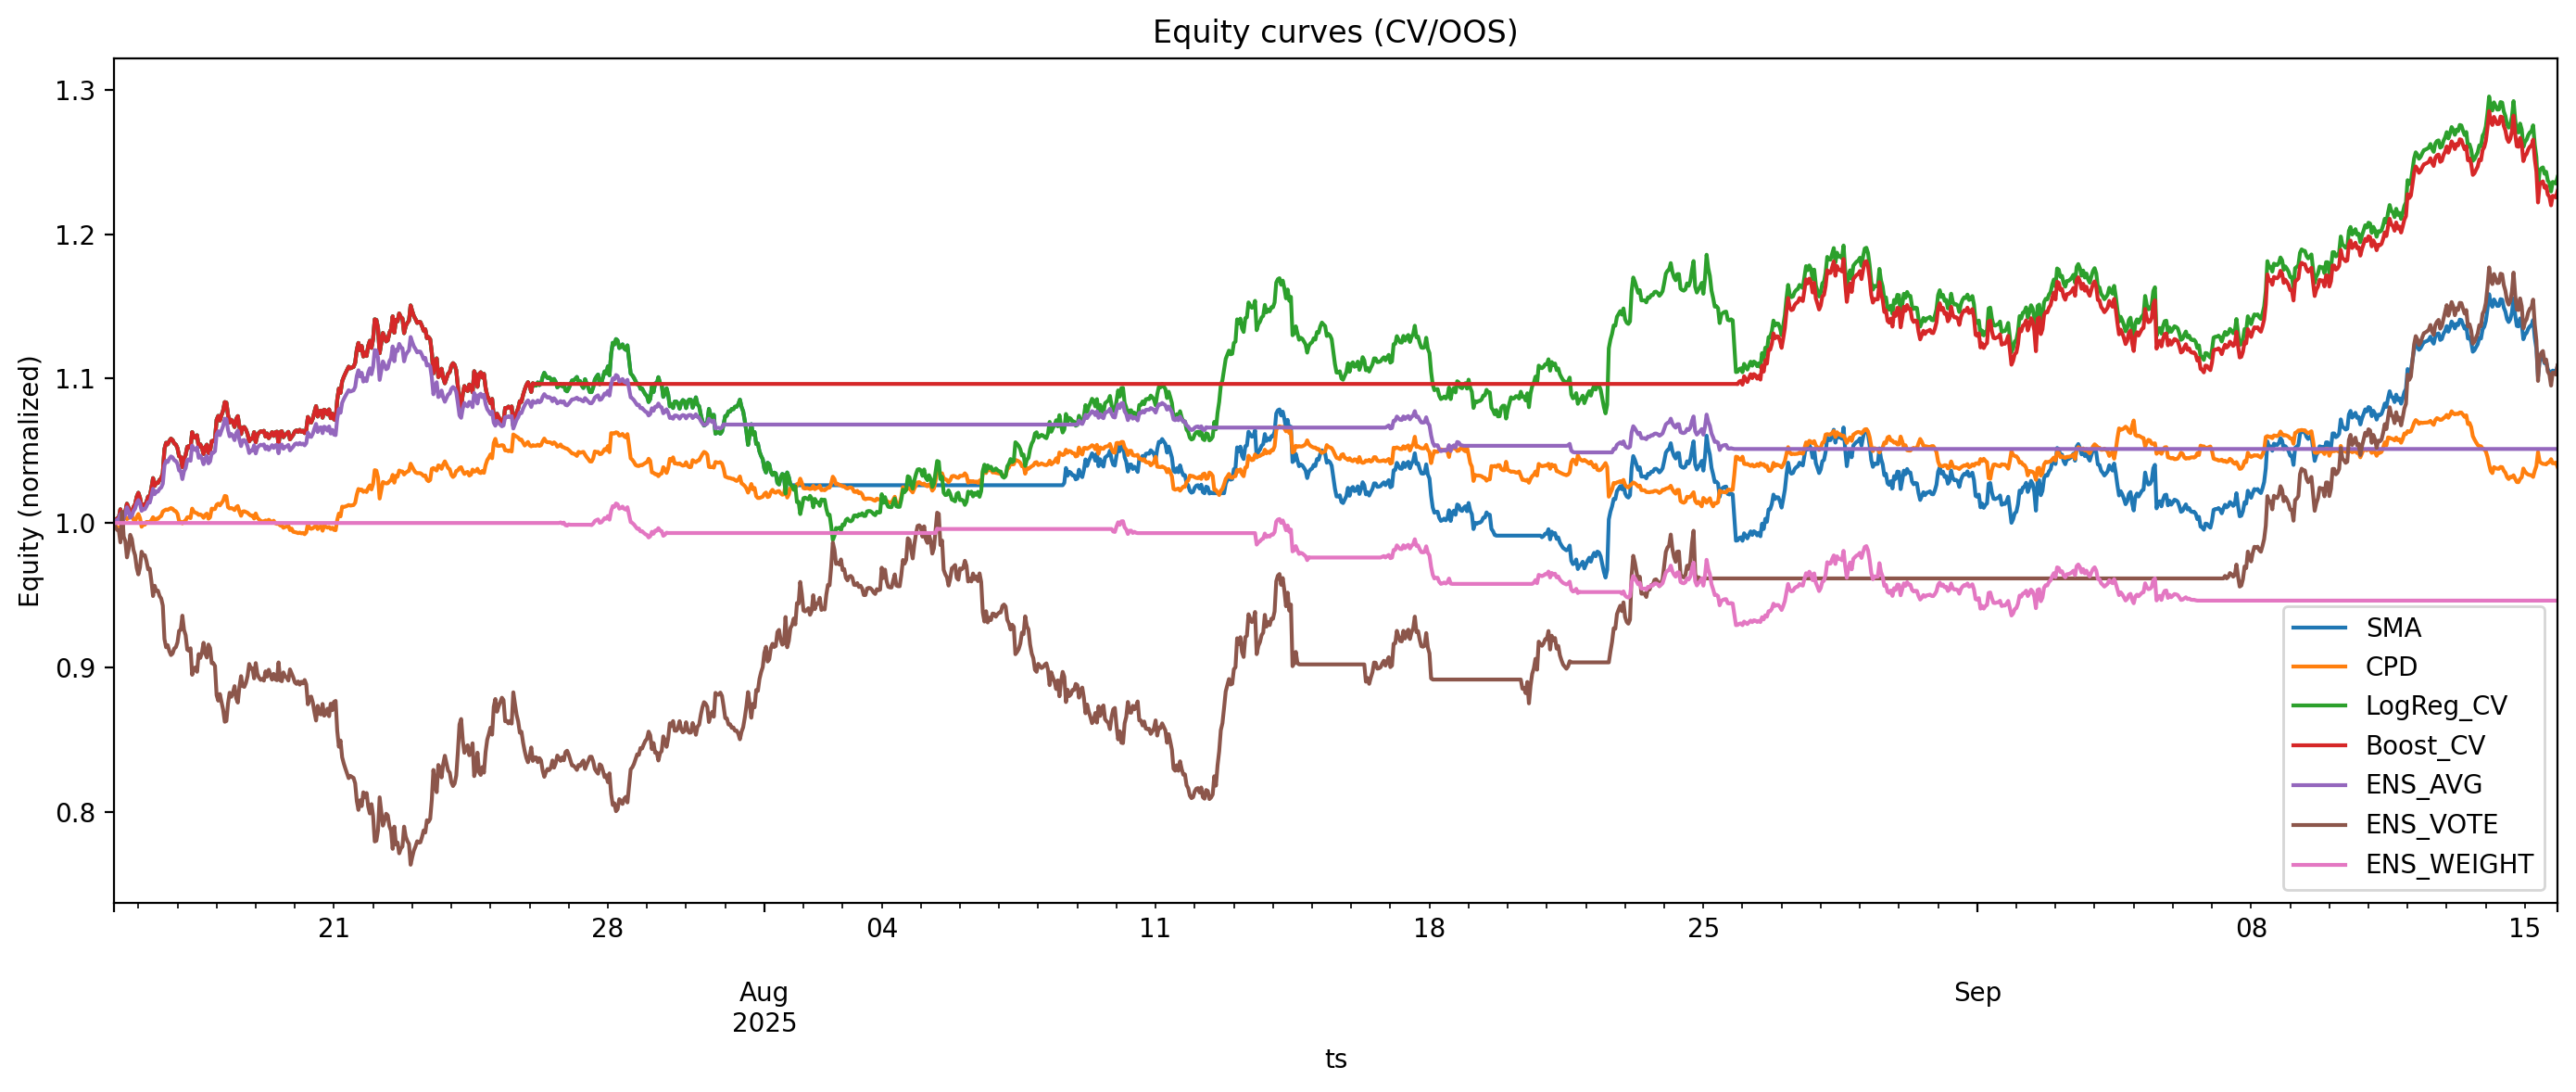

In [19]:
# Build strategies results
def plot_equities(equities: dict[str, pd.Series], last_n: int | None = 1500, title="Equity curves (CV/OOS)"):
    
    eqs = {}
    for name, eq in equities.items():
        if last_n is not None:
            eq = eq.iloc[-last_n:]
        eq = eq / eq.iloc[0] if len(eq) else eq
        eqs[name] = eq

    plt.figure(figsize=(14, 6))
    for name, eq in eqs.items():
        eq.plot(label=name, lw=1.5)
    plt.title(title)
    plt.ylabel("Equity (normalized)")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_equities({
    "SMA": eq.get('SMA_RS'), "CPD": eq.get('CPD_RS') ,
    "LogReg_CV": eq.get('LogReg_RS'), "Boost_CV": eq.get('Boost_RS'),
    "ENS_AVG": eq.get('ENS_AVG'), "ENS_VOTE": eq.get('ENS_VOTE'), "ENS_WEIGHT": eq.get('ENS_WEIGHT')
}, last_n=1500)


**Comments section for part 2:**

1. Possible features

- Momentum & Oscillators: RSI, MACD, Stochastic, lagged returns (1h, 4h, 24h).

- Volatility: rolling average, realized vol.

- Volume/Liquidity: volume z-score, bid–ask spread proxy.

- Market Regimes: trend/flat indicators (ADL, Hurst proxy).

- Time-Series Features: lags, seasonality, frequency features.

2. Targets

**Returns** or **binary** {1,0} (up vs. down) -> choose bin target 

3. Training & Retraining

- Standard train/test split (hold-out OOS evaluation).

- Retraining options: fixed frequency (once at month), drift detection (model degradation, data drift, another conditions)

4. Metrics

- Performance: ROI, CAGR, Final Equity, MaxDD.

- Risk-adjusted: Annualized Vol, Sharpe Ratio.

- Validation: permutation test (p-value), block bootstrap CI, OOS hold-out comparison.

5. Model Roles

- GARCH: volatility forecast → scales position size.

- CPD: used as both signal and lagged feature.

6. Outputs

- Equity curve (from backtest).


#### **Compare params**

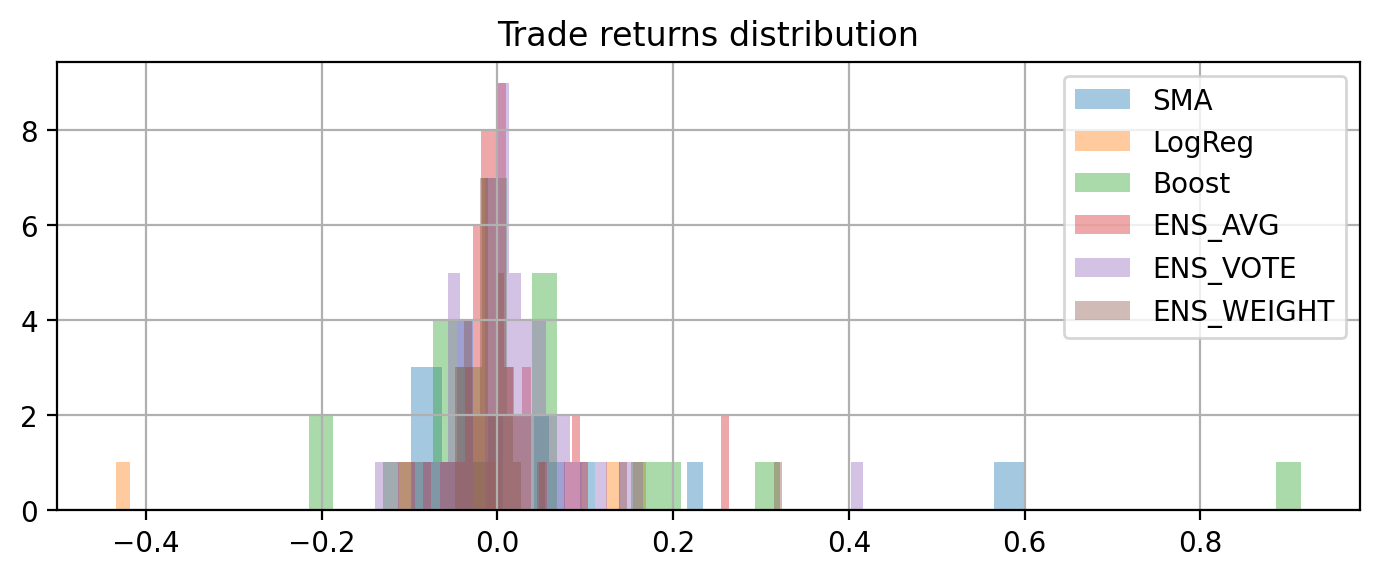

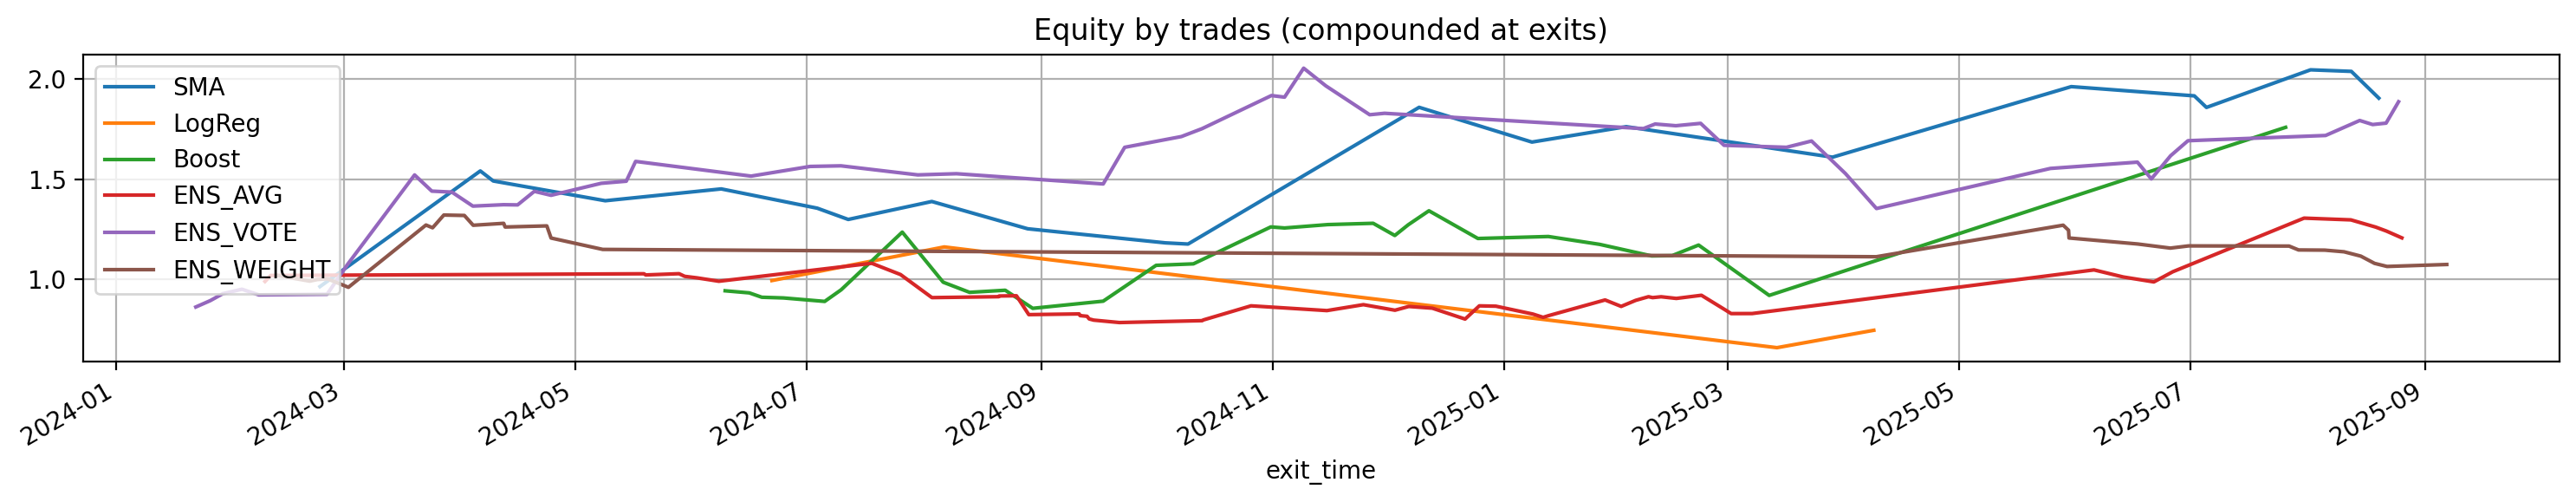

               N  WinRate  ExpRet  MedianRet  AvgWin  AvgLoss  Payoff      PF  \
SMA         21.0   0.3333  0.0454    -0.0302  0.2371  -0.0505  4.6960  2.3480   
Boost       29.0   0.5172  0.0336     0.0015  0.1261  -0.0655  1.9244  2.0619   
ENS_VOTE    52.0   0.5962  0.0152     0.0046  0.0547  -0.0432  1.2667  1.8699   
ENS_AVG     55.0   0.4364  0.0053    -0.0057  0.0480  -0.0279  1.7248  1.3353   
ENS_WEIGHT  30.0   0.3333  0.0044    -0.0126  0.0578  -0.0223  2.5917  1.2958   
LogReg       4.0   0.5000 -0.0349     0.0626  0.1507  -0.2204  0.6837  0.6837   

            AvgHoldBars    Best   Worst  CumRet  
SMA            360.0952  0.6005 -0.0982  0.9045  
Boost          222.7586  0.9145 -0.2150  0.7586  
ENS_VOTE        90.8077  0.4160 -0.1393  0.8865  
ENS_AVG         73.8182  0.2635 -0.1128  0.2061  
ENS_WEIGHT      65.6667  0.3244 -0.0479  0.0731  
LogReg         600.7500  0.1691 -0.4337 -0.2557  


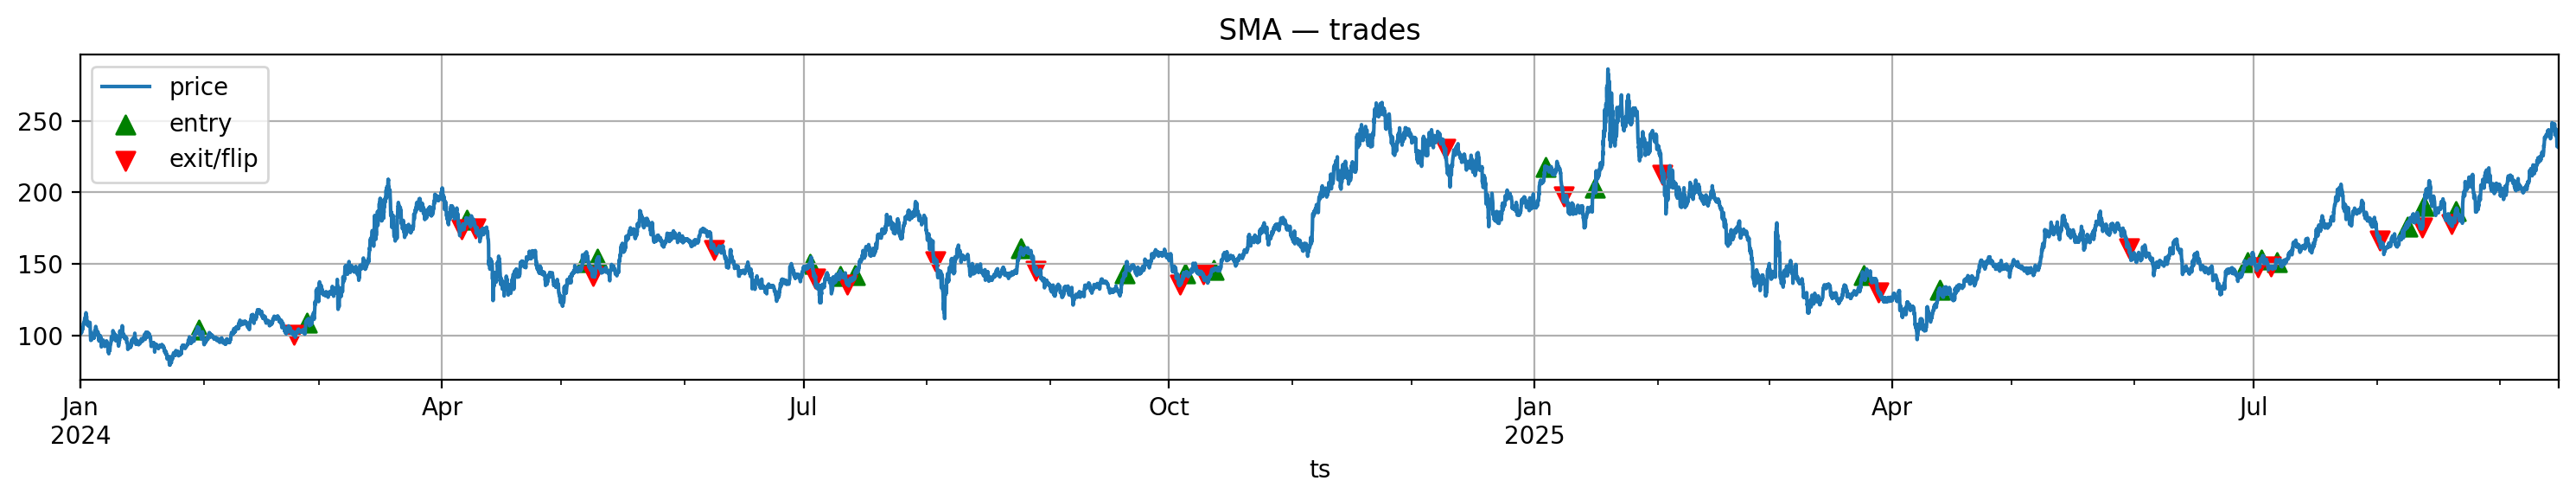

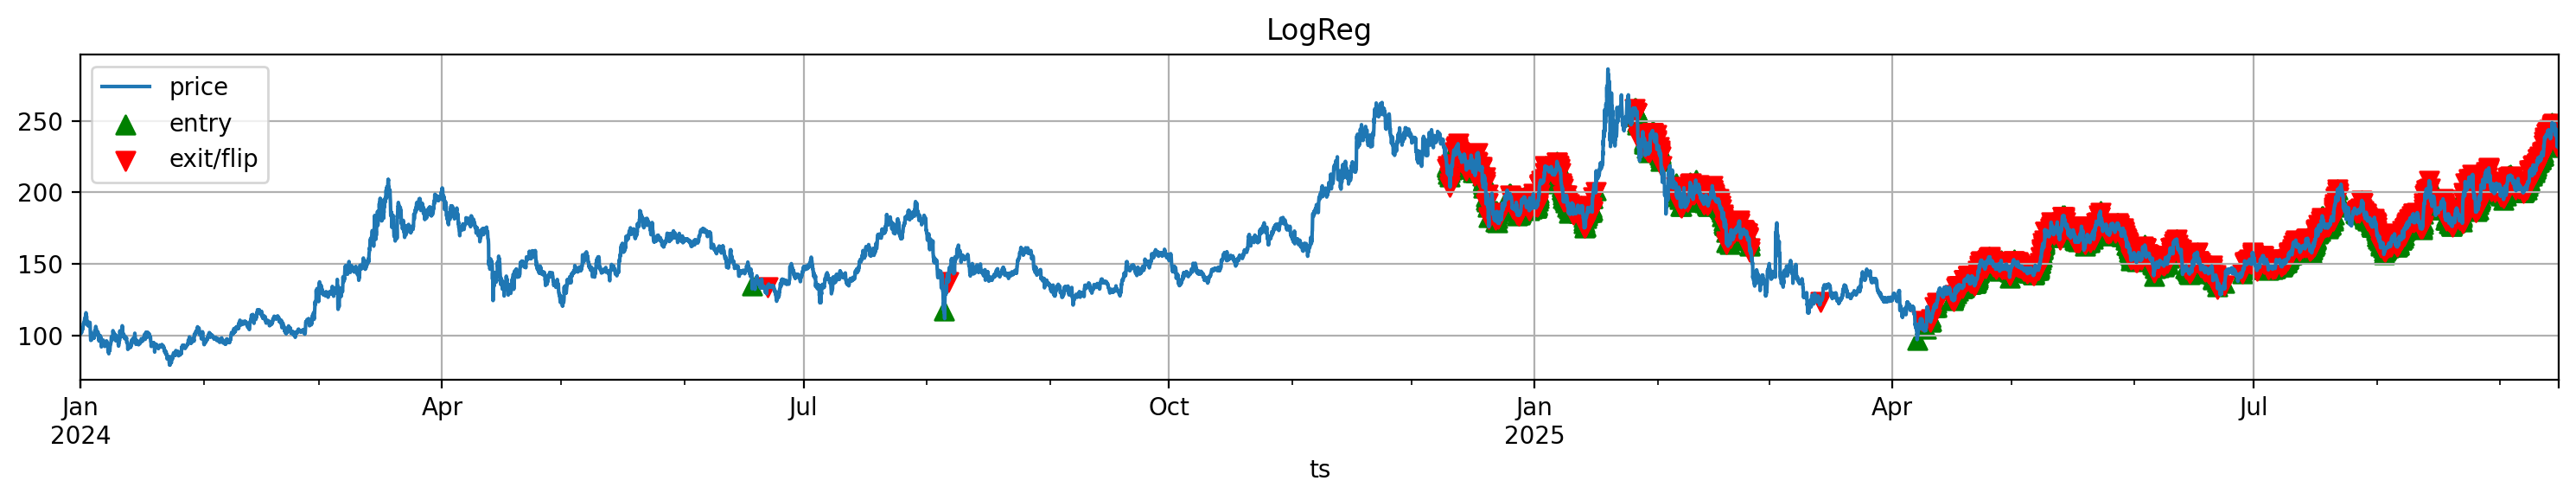

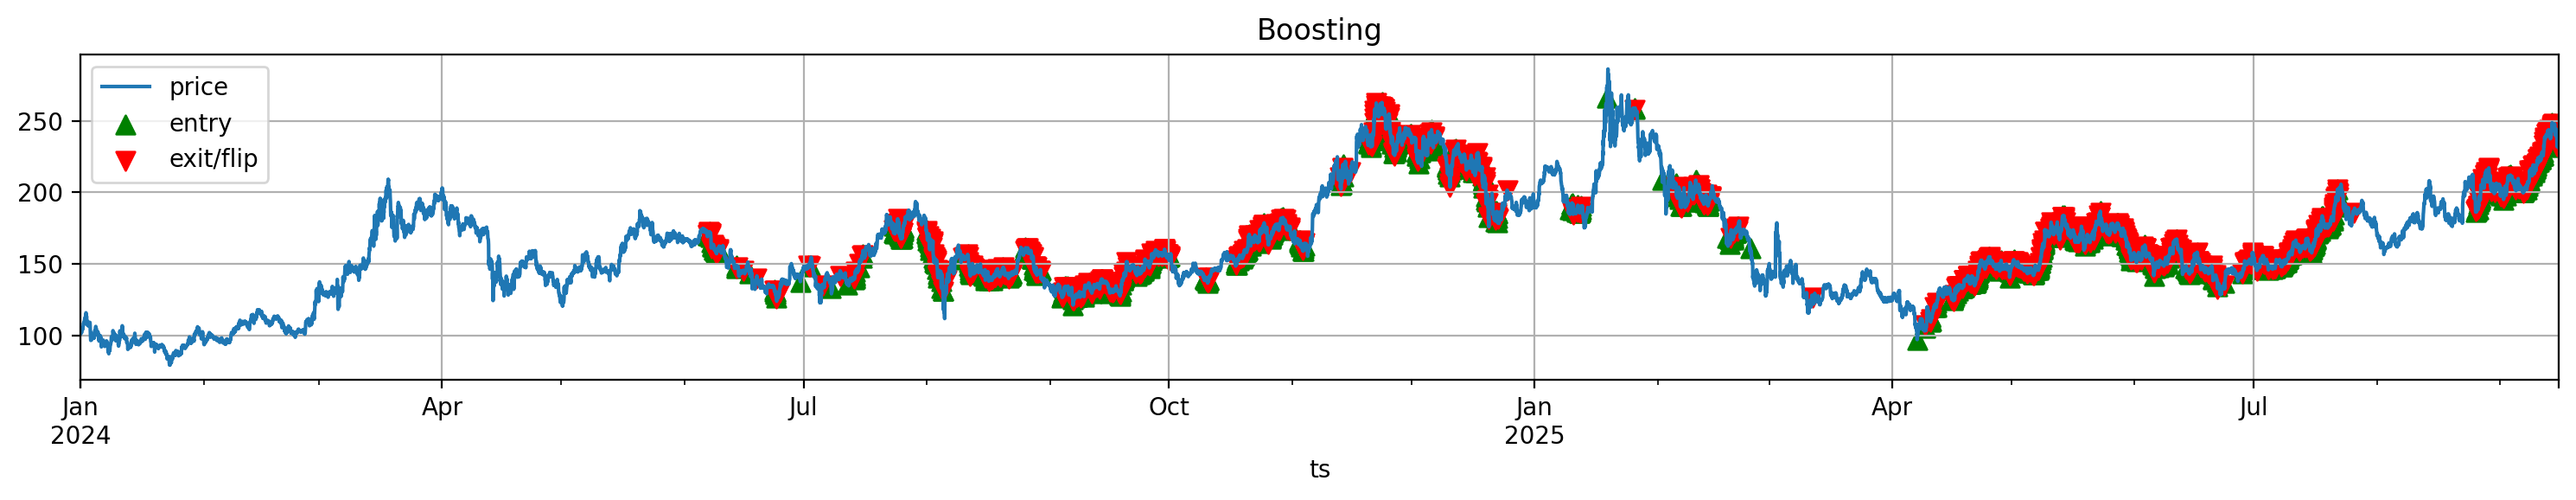

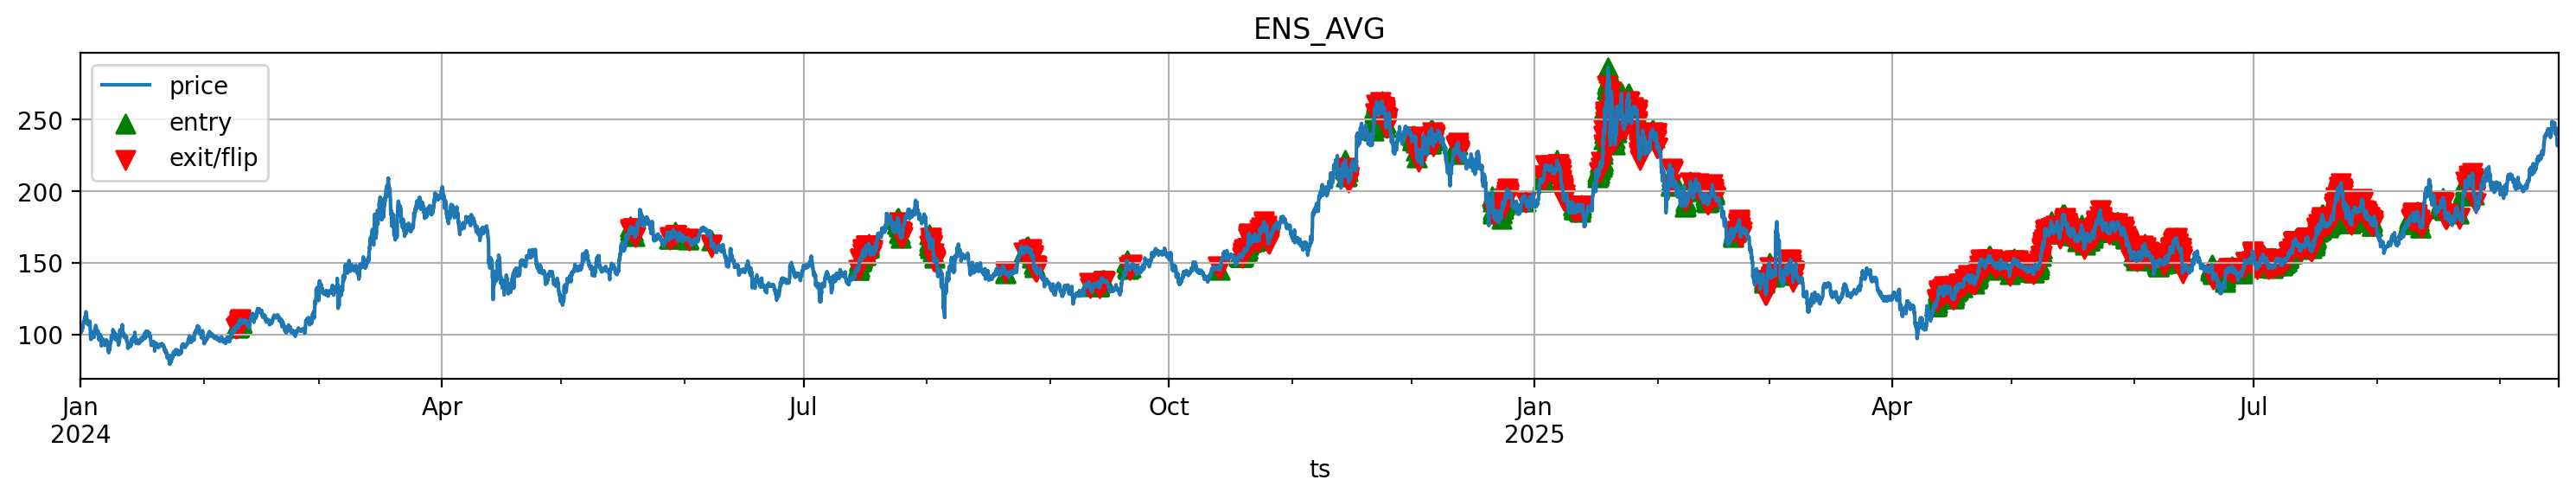

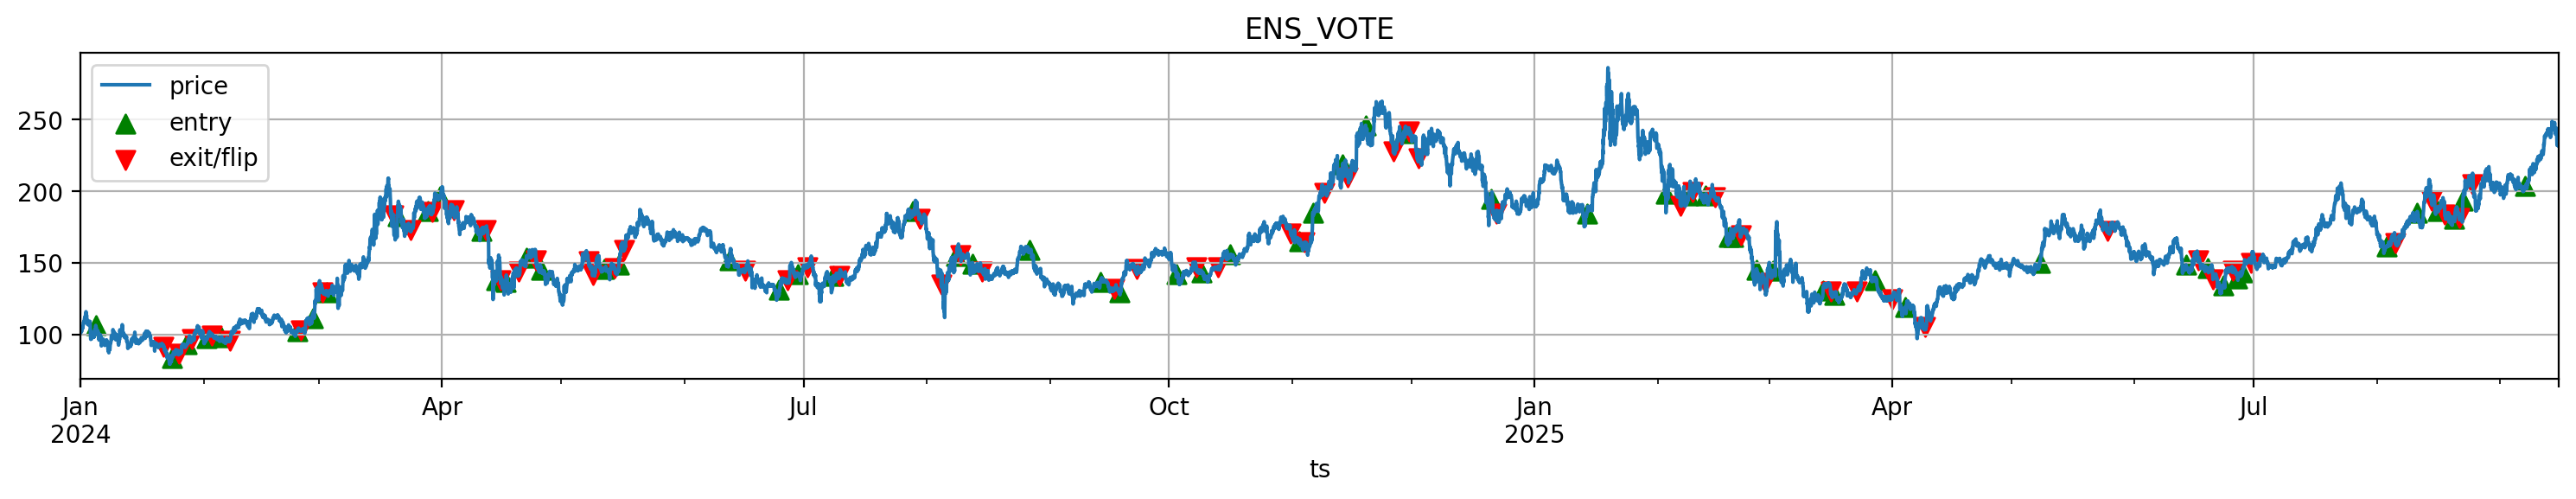

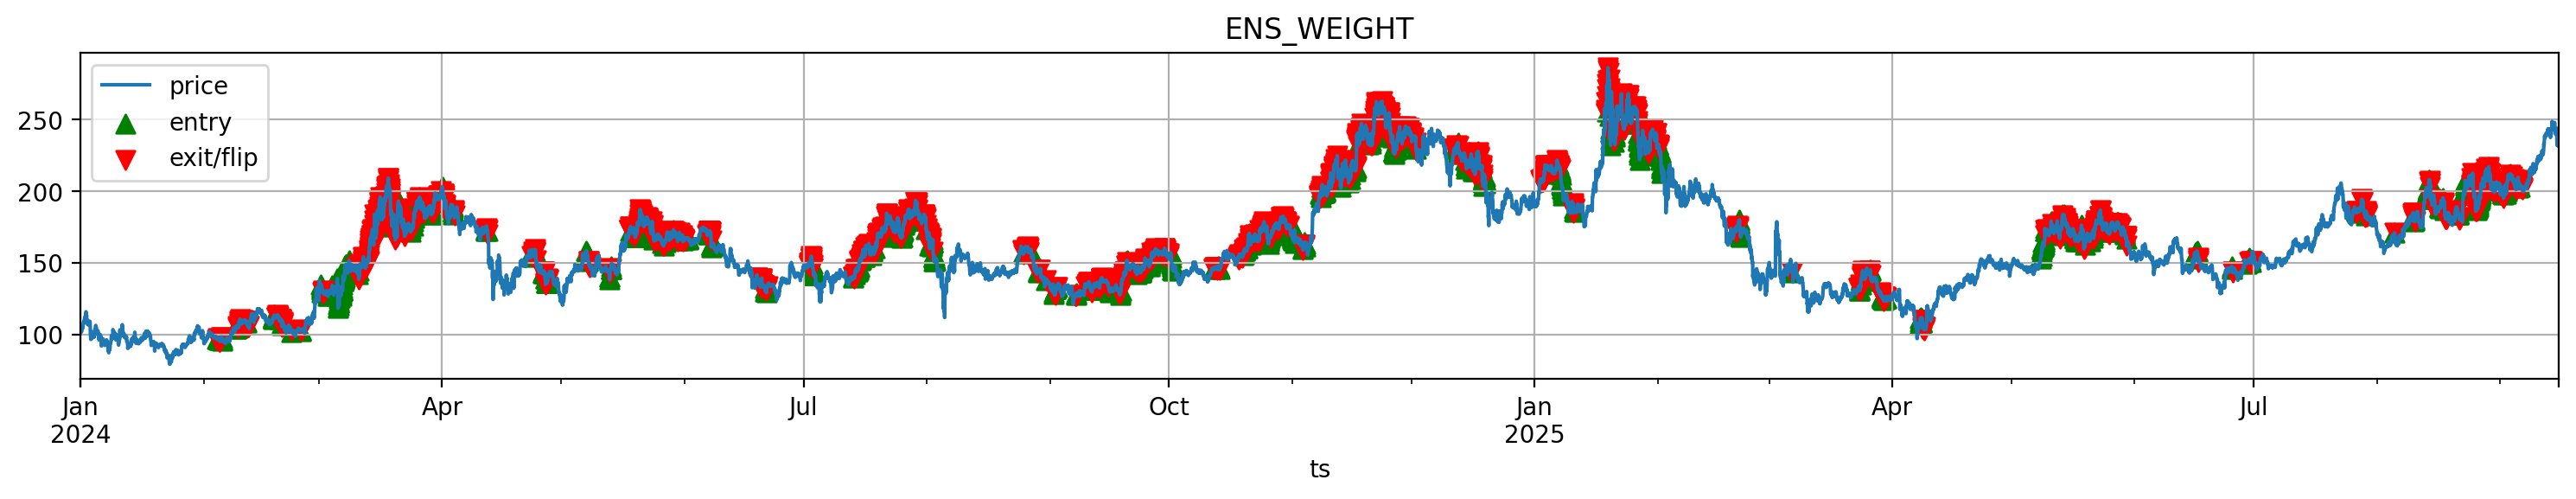

In [20]:
summary_trades, trades_logs, eq_trade_curves = compare_by_trades(price, {
    "SMA": sig_sma,
    # "ARIMA": sig_arima,

    "LogReg": sig_log_rs,
    "Boost": sig_gb_rs,
    
    "ENS_AVG": sig_ens_avg,
    "ENS_VOTE": sig_ens_vote,
    "ENS_WEIGHT": sig_ens_weight,
}, side="long_only")

print(summary_trades.sort_values(["PF","WinRate","ExpRet"], ascending=[False, False, False]))

# Markers for in/out on price for each strategy
plot_price_with_trades(price, sig_sma, title="SMA — trades")
trades_logs["SMA"].head()

# plot_price_with_trades(price, sig_garch, title="GARCH")
plot_price_with_trades(price, sig_log_rs, title="LogReg")
plot_price_with_trades(price, sig_gb_rs, title="Boosting")
plot_price_with_trades(price, sig_ens_avg, title="ENS_AVG")

plot_price_with_trades(price, sig_ens_vote, title="ENS_VOTE")

plot_price_with_trades(price, sig_ens_weight, title="ENS_WEIGHT")



### Part 3 

**Portfolio management part**


**Idea for portfolio: we have many signal from different models and shoode choose the best or prioritize them**
- delay signals feedback (react on signals with delay = signal has to proove it's correct in shprt period of time)
- after new position take rest period without active traiding actions
- new signal have higher prioritize (with EMA)

In [22]:
dynam_df = global_df.rename(columns={'Open':'open','Close':'close','High':'high','Low':'low','Volume':'volume'})[["close",'symbol','ts']]
dynam_df = dynam_df.reset_index(drop=True)
print(len(dynam_df))


4320790


In [23]:
# wide table transform
def prices_wide(df12: pd.DataFrame, symbols: list[str]) -> pd.DataFrame:
    px = (df12[df12['symbol'].isin(symbols)]
          .pivot(index='ts', columns='symbol', values='close')
          .sort_index())

    
    px = px.ffill()
    
    min_non_nan = max(3, int(0.7 * px.shape[1]))
    px = px.dropna(thresh=min_non_nan)
    return px

In [24]:
coins = dynam_df.symbol.unique()
print(f'Amount of coins: {len(coins)}')

Amount of coins: 344


In [25]:
# choose only data with full current data
def filter_last_year_universe(prices: pd.DataFrame,
                              min_days: int = 365*2,
                              min_coverage: float = 0.90,   
                              max_ffill_hours: int = 24) -> tuple[pd.DataFrame, list]:
   
   
    px = prices.copy()

    px.index = pd.to_datetime(px.index)
    px = px.sort_index()
    if px.index.has_duplicates:
        px = px.groupby(level=0).last()
    px = px.replace([np.inf, -np.inf], np.nan)


    dt = pd.Series(px.index).diff().dropna()
    sec = dt.median().total_seconds() if len(dt) else 3600.0 
    bars_per_hour = max(1, int(round(3600.0 / sec)))
    bars_per_year = int(round(24 * 365 * bars_per_hour))


    end = px.index[-1]
    start = end - pd.Timedelta(days=min_days)
    px_year = px.loc[start:end]


    counts = px_year.notna().sum()
    keep = counts[counts >= int(min_coverage * bars_per_year)].index.tolist()
    px_year = px_year[keep]


    limit = max_ffill_hours * bars_per_hour
    cleaned = px_year.ffill(limit=limit).bfill(limit=limit)

    return cleaned, keep

In [26]:
coins = dynam_df.symbol.unique()

wide_tb = prices_wide(dynam_df.drop_duplicates(subset=['ts', 'symbol'], keep='last'), symbols = coins)
wide_tb.head()

symbol               1INCHUSDT  A2ZUSDT  AAVEUSDT  ACEUSDT  ACHUSDT  ACTUSDT  \
ts                                                                             
2024-03-05 14:00:00     0.6072      NaN    116.91  13.1930  0.02915      NaN   
2024-03-05 15:00:00     0.5946      NaN    115.54  12.9642  0.02843      NaN   
2024-03-05 16:00:00     0.5860      NaN    112.71  12.8621  0.02791      NaN   
2024-03-05 17:00:00     0.5895      NaN    112.66  12.9276  0.02798      NaN   
2024-03-05 18:00:00     0.5865      NaN    110.91  12.7269  0.02755      NaN   

symbol               ACXUSDT  ADAUSDT  AERGOUSDT  AEVOUSDT  ...  XVSUSDT  \
ts                                                          ...            
2024-03-05 14:00:00      NaN   0.7753     0.1767       NaN  ...    12.83   
2024-03-05 15:00:00      NaN   0.7540     0.1732       NaN  ...    12.87   
2024-03-05 16:00:00      NaN   0.7342     0.1687       NaN  ...    12.54   
2024-03-05 17:00:00      NaN   0.7346     0.1715       NaN  ...    12.58   
2024-03-05 18:00:00      NaN   0.7191     0.1692       NaN  ...    12.45   

symbol               YFIUSDT  YGGUSDT  ZECUSDT  ZENUSDT  ZILUSDT  ZKCUSDT  \
ts                                                                          
2024-03-05 14:00:00  10316.0   0.6564    34.18    12.23  0.03544      NaN   
2024-03-05 15:00:00  10728.0   0.6525    34.19    12.18  0.03364      NaN   
2024-03-05 16:00:00  10281.0   0.6476    33.25    12.01  0.03282      NaN   
2024-03-05 17:00:00  10123.0   0.6471    33.53    11.98  0.03302      NaN   
2024-03-05 18:00:00  10016.0   0.6412    32.81    11.80  0.03248      NaN   

symbol               ZKUSDT  ZROUSDT  ZRXUSDT  
ts                                             
2024-03-05 14:00:00     NaN      NaN   0.4596  
2024-03-05 15:00:00     NaN      NaN   0.4369  
2024-03-05 16:00:00     NaN      NaN   0.4335  
2024-03-05 17:00:00     NaN      NaN   0.4300  
2024-03-05 18:00:00     NaN      NaN   0.4260  

[5 rows x 344 columns]

In [31]:
cleaned_last_year, universe = filter_last_year_universe(wide_tb, min_days=365*2, min_coverage=0.9)
print(len(universe), "coins after cleaning")

268 coins after cleaning


In [38]:
# split date to create portolio
split_date = '2024-09-16'
row_data = cleaned_last_year[cleaned_last_year.index<split_date]

**Coins deoendences and correlations**

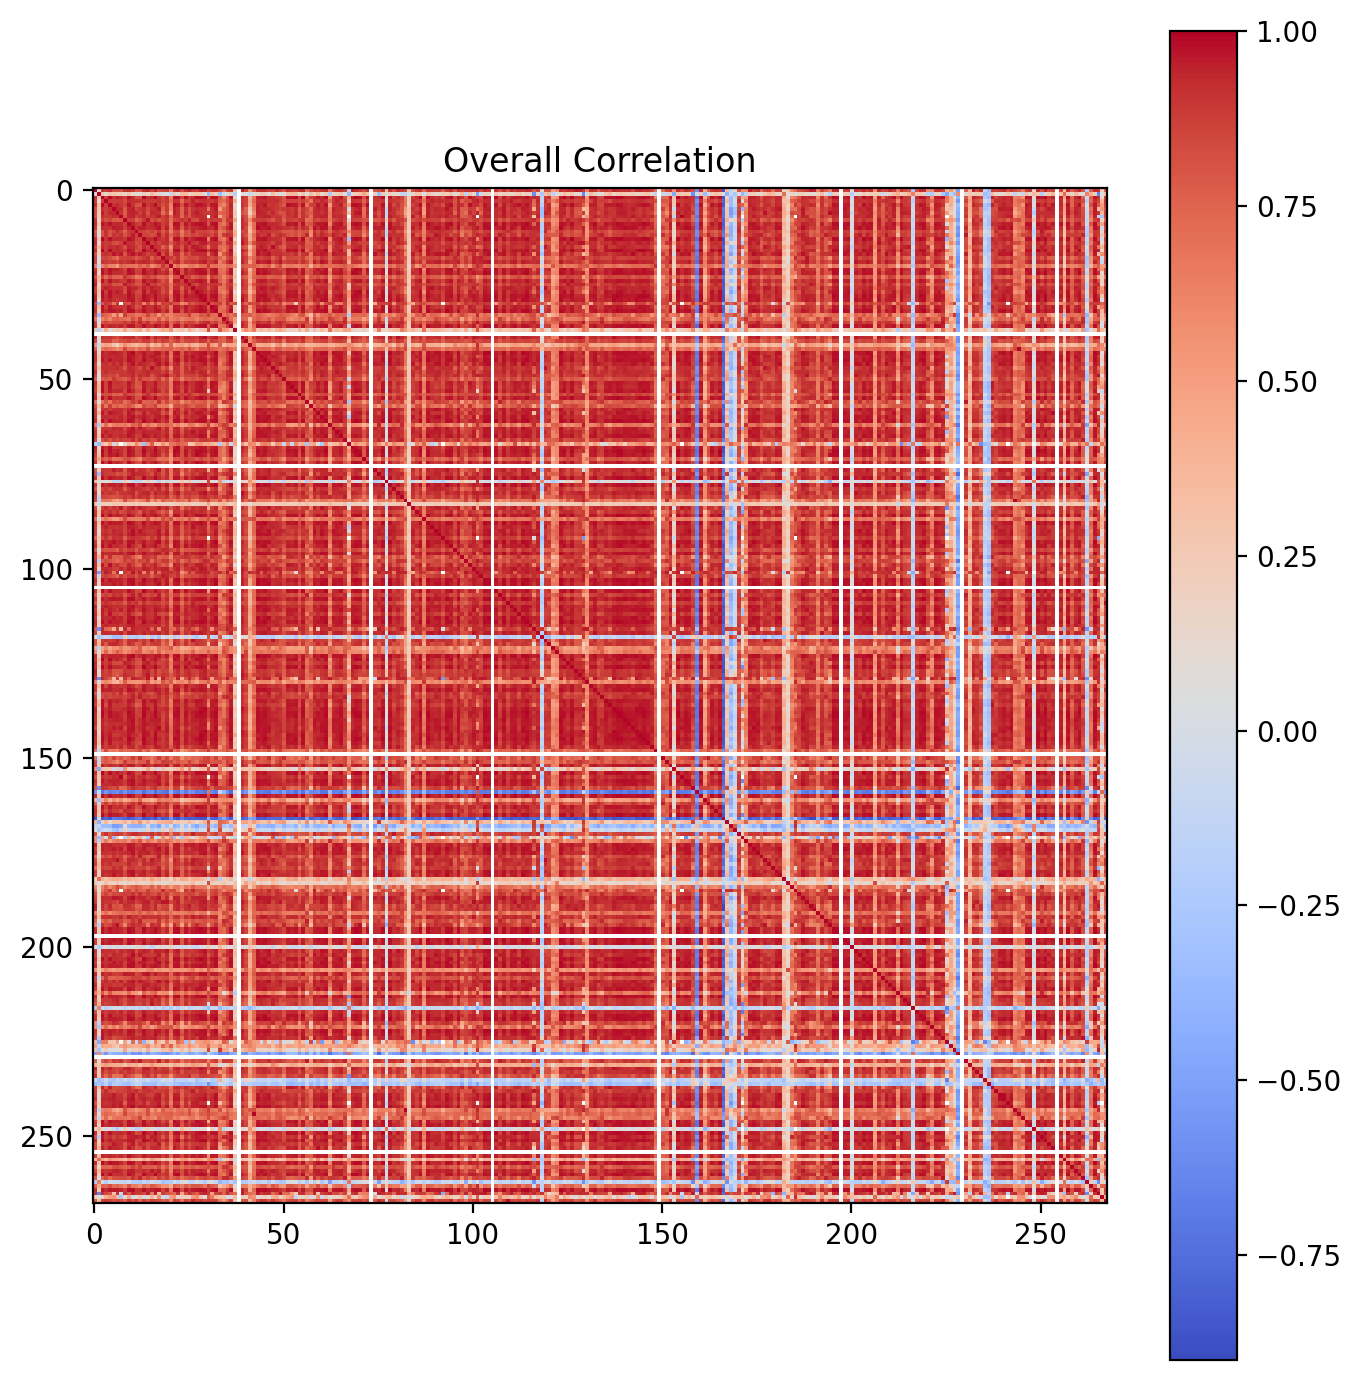

In [41]:
corr_matrix = row_data.corr()
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Overall Correlation')
plt.tight_layout()
plt.show()

**Coin have high correlation**

Selected assets: ['AAVEUSDT', 'AMPUSDT', 'ARUSDT', 'BBUSDT', 'BNBUSDT', 'CKBUSDT', 'CTKUSDT', 'CVCUSDT', 'DEXEUSDT', 'EDUUSDT', 'FDUSDUSDT', 'FETUSDT', 'FLOKIUSDT', 'GALUSDT', 'JASMYUSDT', 'JTOUSDT', 'JUPUSDT', 'LPTUSDT', 'NEARUSDT', 'NOTUSDT', 'OMUSDT', 'PAXGUSDT', 'PENDLEUSDT', 'PEOPLEUSDT', 'PEPEUSDT', 'PHAUSDT', 'POLYXUSDT', 'QKCUSDT', 'RAREUSDT', 'RAYUSDT', 'REIUSDT', 'REQUSDT', 'RSRUSDT', 'SFPUSDT', 'SOLUSDT', 'SUIUSDT', 'SUNUSDT', 'TFUELUSDT', 'TRUUSDT', 'TRXUSDT', 'USDCUSDT', 'USDPUSDT', 'VANRYUSDT', 'WIFUSDT', 'WNXMUSDT', 'XRPUSDT', 'ZECUSDT', 'ZROUSDT']


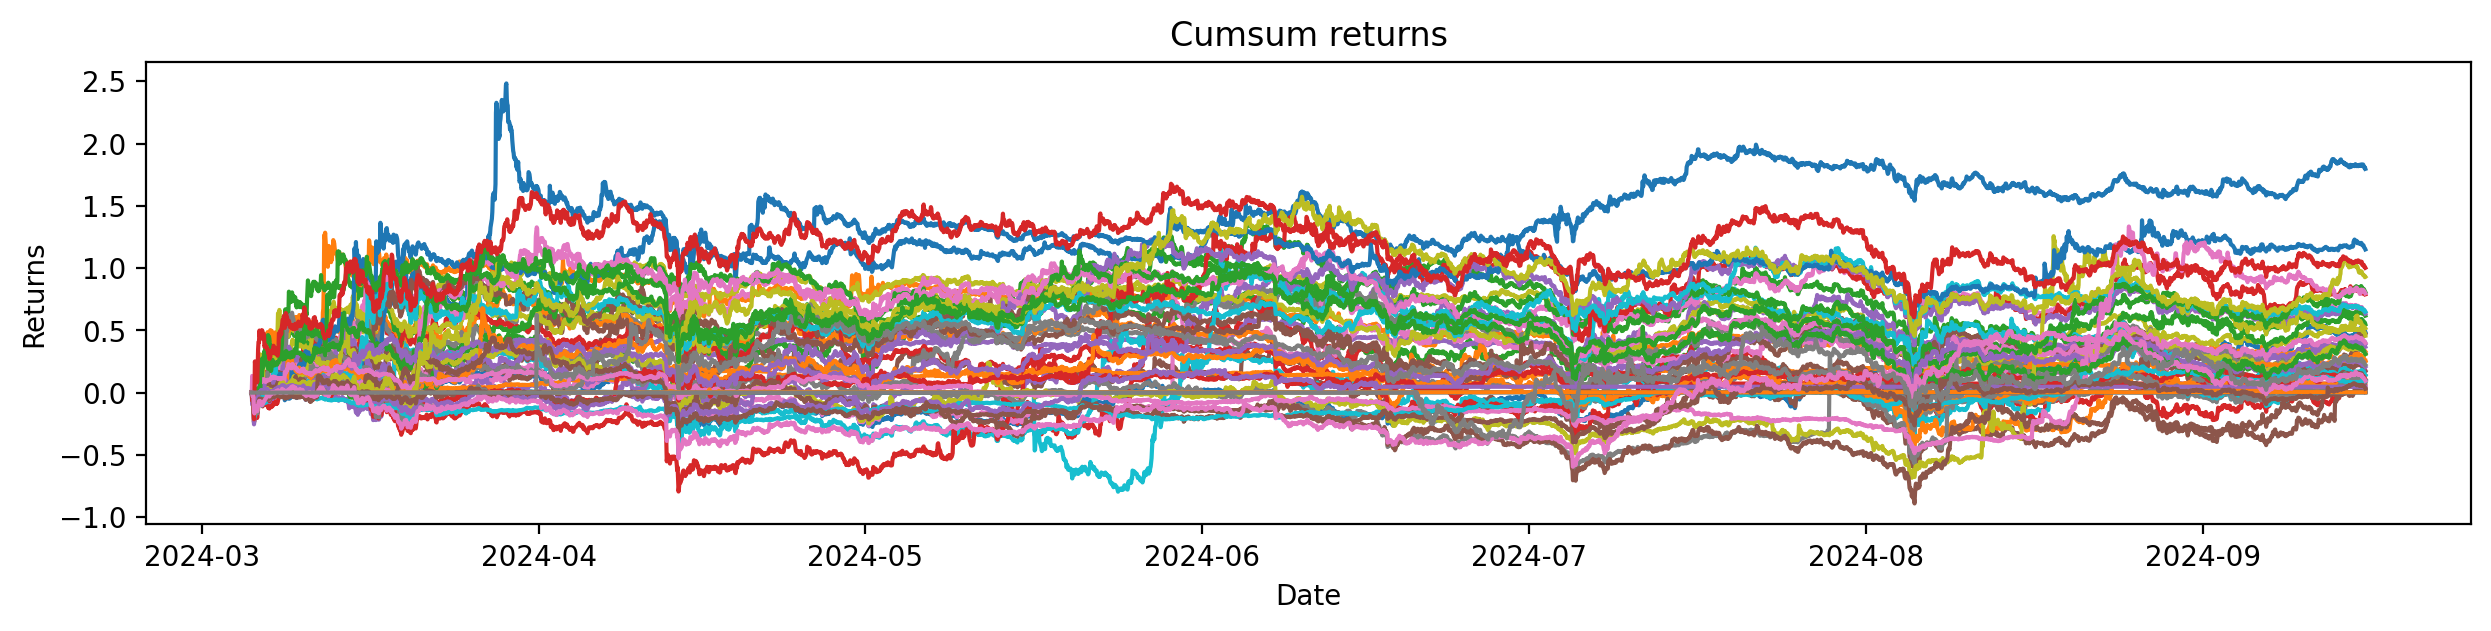

In [76]:
returns_split_part = row_data.pct_change().fillna(0)

mean_returns = returns_split_part.mean()
volatility = returns_split_part.std()


correlation_matrix = returns_split_part.corr()


# threshold_corr = 0.7
selected_assets = []


for asset in row_data.columns:
    if mean_returns[asset] > 0:  
        correlations_with_others = correlation_matrix[asset]
        # if all(abs(correlation) < threshold_corr for correlation in correlations_with_others):
        selected_assets.append(asset)

print(f"Selected assets: {selected_assets}")



plt.figure(figsize=(15, 3))
plt.plot(returns_split_part[selected_assets].cumsum())
plt.title("Cumsum returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

In [72]:
len(selected_assets)

48

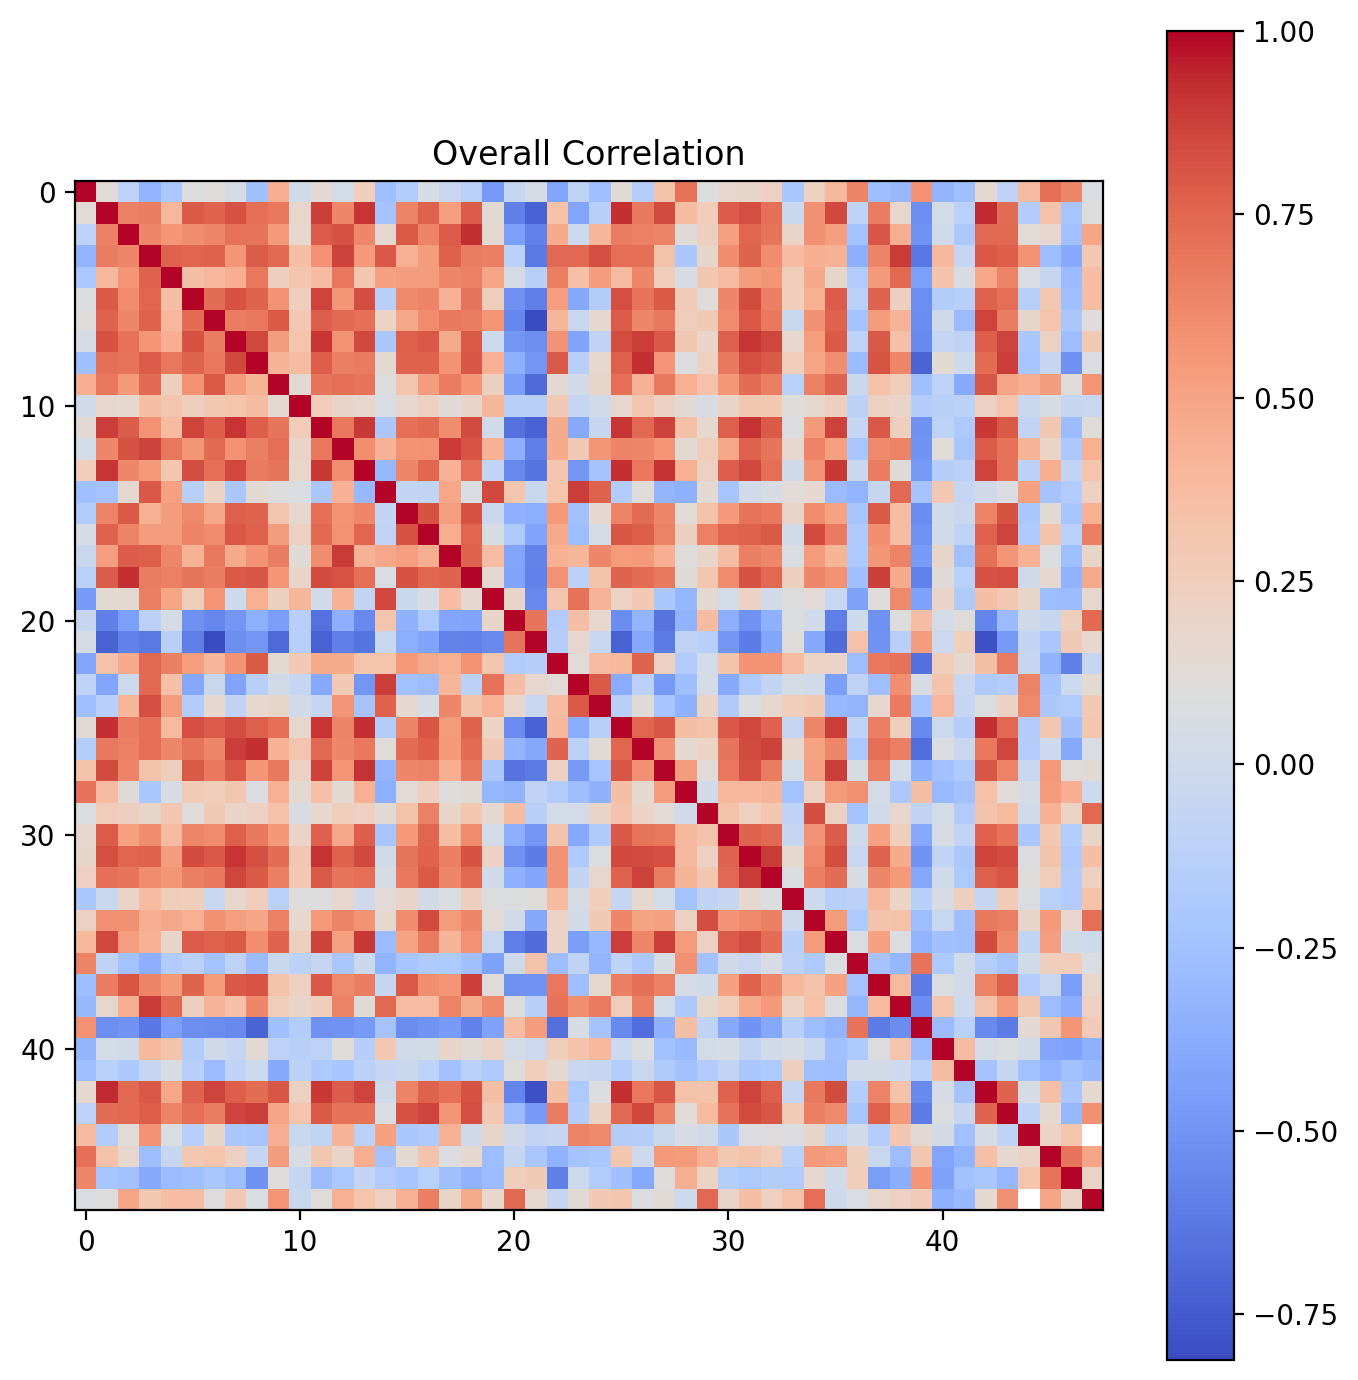

In [77]:
corr_matrix = row_data[selected_assets].corr()
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Selected data correlation')
plt.tight_layout()
plt.show()

In [101]:
# vol filtration

vol_df = pd.DataFrame({'vol':volatility[selected_assets]}).sort_values(by = 'vol',ascending = False)
vol_df.index[:7]

Index(['REIUSDT', 'WIFUSDT', 'CTKUSDT', 'AMPUSDT', 'PEOPLEUSDT', 'TRUUSDT',
       'FLOKIUSDT'],
      dtype='object', name='symbol')

### Part 3-4 -- portfolio rebalancing (not dynamic and dynamic)


**Use base strategies:**
- EQ_M_monthly
- EQ_M_50bps
- EQ_M_dynBands
- MV_M_dynBands


**Build portfolio with selected coins**

In [102]:
# use selected coin + naew data filter
prices = wide_tb[wide_tb.index>=split_date][vol_df.index[:7]].copy() 

curves, summary = run_dynamic_demo(prices, lookback=60, max_w=0.4, fee_bps=5.0)
print(summary)

                 CAGR  Sharpe   MaxDD  FinalEq
MV_M_dynBands -0.2347  0.2546 -0.8323   0.7648
EQ_M_dynBands -0.2806  0.1607 -0.8130   0.7188
EQ_M_monthly  -0.3796  0.0240 -0.8219   0.6197
EQ_M_50bps    -0.3796  0.0240 -0.8219   0.6197


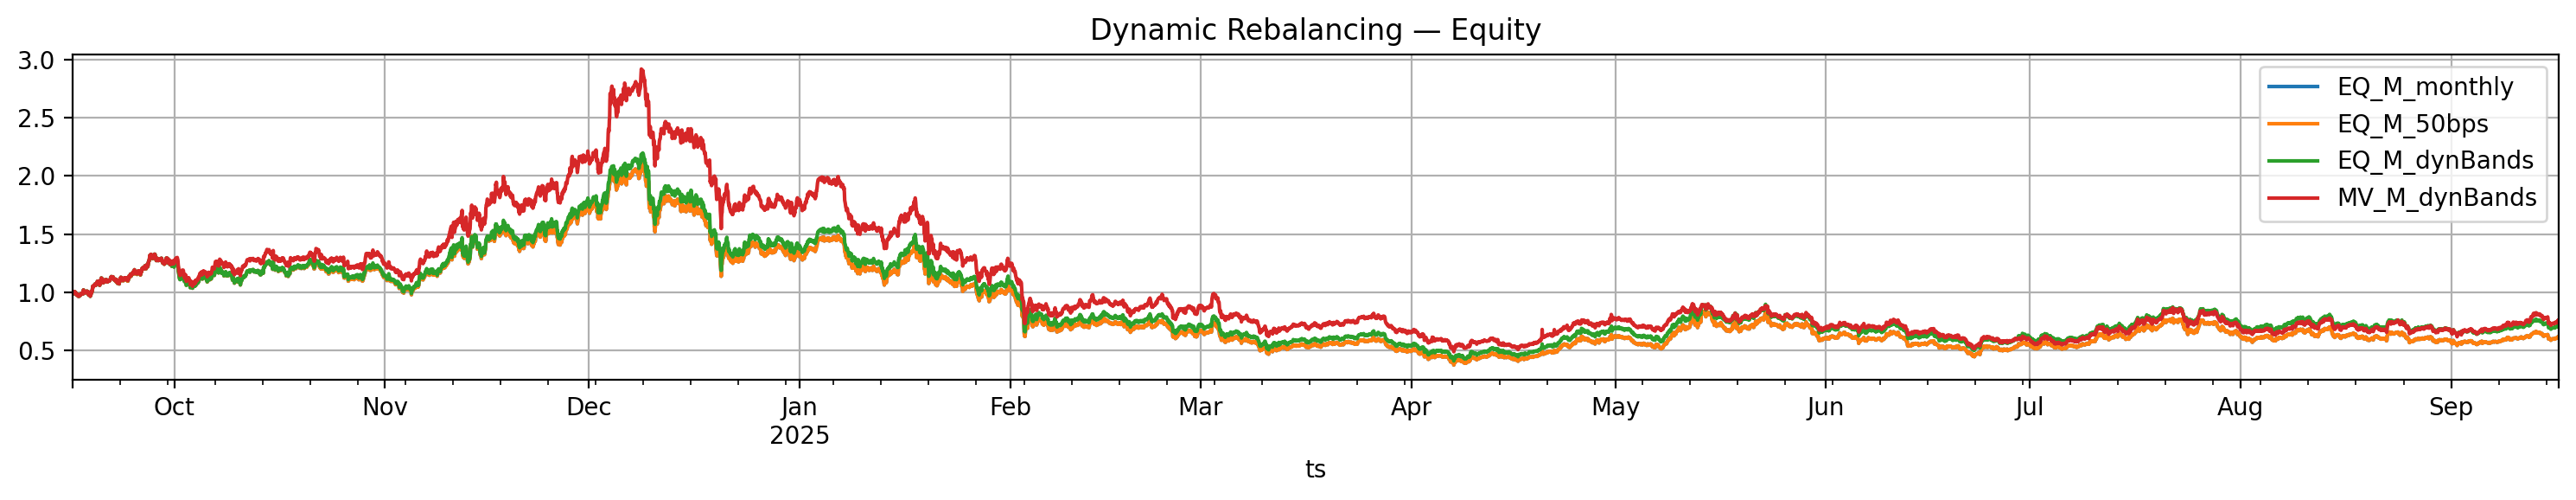

EQ_M_dynBands: {'CAGR': -0.2806, 'Sharpe': 0.1607, 'MaxDD': -0.813, 'FinalEq': 0.7188}
MV_M_dynBands: {'CAGR': -0.2347, 'Sharpe': 0.2546, 'MaxDD': -0.8323, 'FinalEq': 0.7648}


In [103]:
plt.figure(figsize=(15,3))
for name, eq in curves.items():
    eq.plot(label=name)
plt.title("Dynamic Rebalancing — Equity")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# 
tw_eqM = equal_weight_targets(prices, freq='M')
tw_mvM = mv_targets(prices, lookback=60, max_w=0.4, freq='M')
band_ts = bands_from_vol(prices, span=20, base_bps=40, k_vol=150)

eq_eq_bands = portfolio_equity_dynamic_v3(prices, tw_eqM, band_bps_ts=band_ts, fee_bps=5.0, max_turnover=0.25)
eq_mv_bands = portfolio_equity_dynamic_v3(prices, tw_mvM, band_bps_ts=band_ts, fee_bps=5.0, max_turnover=0.25)

print("EQ_M_dynBands:", brief_report(eq_eq_bands).round(4).to_dict())
print("MV_M_dynBands:", brief_report(eq_mv_bands).round(4).to_dict())


#### **MV_M_dynBands** repabans show best avg results on choosing TS period

**Comments section for part 3:**

1. Best Portfolio:

Passive strategy performs best under current setup.

2. How to Use Results:

Use as a baseline benchmark for future active/AI-driven strategies.

Compare active models vs. passive allocation to measure added value.

3. Volatility Difference:

Track and compare volatility across models to evaluate stability and risk.





**Comments section for part 4:**

1. Rebalancing Logic:

- Periodic (e.g., weekly, monthly).

- Threshold-based (when weights deviate beyond X%).

- Signal-based (triggered by AI agents or risk metrics).

2. Choosing the Best Strategy:

- Compare performance vs. transaction costs.

- Evaluate risk-adjusted returns (Sharpe, MaxDD).

- Test across different market regimes (trending vs. volatile).




### **Extra portfolio strategy**

In [96]:
def build_simple_risk_scale(price: pd.Series, window: int = 400, min_scale=0.3, max_scale=1.0) -> pd.Series:
    
    r = price.pct_change().fillna(0.0)
    vol = r.rolling(window, min_periods=max(20, window//5)).std().replace(0, np.nan).bfill()
    scale = (vol.median() / vol).clip(min_scale, max_scale)
    return scale.reindex(price.index).fillna(1.0).rename("RISK_SCALE")


from sklearn.covariance import LedoitWolf

def signal_mv_targets(prices: pd.DataFrame,
                      signals: dict[str, pd.Series],
                      lookback: int = 60,
                      freq: str = "M",
                      gate_abs: float = 0.25,
                      long_only: bool = True,
                      max_w: float = 0.25) -> pd.DataFrame:
    px   = prices.sort_index()
    rets = px.pct_change().dropna(how="all")
    cols = list(px.columns)

    # матрица сигналов S[t, asset]
    S = pd.DataFrame({c: signals.get(c, pd.Series(0.0, index=px.index)).reindex(px.index).astype(float).fillna(0.0)
                      for c in cols}, index=px.index)

    sched = px.resample(freq).last().index
    rows = []
    for t in sched:
        end = rets.index.searchsorted(t, side="right")
        start = max(0, end - lookback)
        win = rets.iloc[start:end]
        s_t = S.loc[:t].iloc[-1].copy() if len(S.loc[:t]) else pd.Series(0.0, index=cols)

        # гейт по силе сигнала
        s_t[(s_t.abs() < gate_abs)] = 0.0

        if len(win) < max(10, lookback//3):
            w = pd.Series(1.0/len(cols), index=cols)
        else:
            
            mu = s_t.copy()
            mu_std = mu.replace(0, np.nan).std()
            if pd.notna(mu_std) and mu_std > 0:
                mu = (mu - mu.mean()) / mu_std
            mu = mu.fillna(0.0)

            # Σ с шринком
            try:
                lw = LedoitWolf().fit(win.fillna(0.0).values)
                cov = pd.DataFrame(lw.covariance_, index=cols, columns=cols)
            except Exception:
                cov = win.cov().replace([np.inf, -np.inf], np.nan).fillna(0.0)

            inv = pd.DataFrame(np.linalg.pinv(cov.values), index=cols, columns=cols)
            raw = inv.dot(mu)

            if long_only:
                w = raw.clip(lower=0.0)
                if max_w is not None:
                    w = w.clip(0, max_w)
                ssum = w.sum()
                w = (w/ssum) if ssum > 0 else pd.Series(1.0/len(cols), index=cols)
            else:
                w = raw / (raw.abs().sum() or 1.0)
                if max_w is not None:
                    w = w.clip(-max_w, max_w)
                g = w.abs().sum()
                if g > 1: w = w / g

        rows.append(w.rename(t))

    return pd.DataFrame(rows).reindex(px.index).ffill().reindex(columns=cols).fillna(0.0)


In [97]:
# collect signals from models
def build_suite_signals_for_all_assets(prices: pd.DataFrame) -> dict[str, pd.Series]:
    """
    IN: wide prices.
    OUT: per-asset signals [-1..1].
    """
    all_signals = {}
    for col in prices.columns:
        px = prices[col].dropna()
        if len(px) < 500:  
            continue

        df_single = pd.DataFrame({"ts": px.index, "close": px.values})
        suite = AITradingSuite(df_single, SuiteConfig(fee_bps=5, slippage_bps=2))

        
        suite.build_features(
            mom_windows=(24,72), vol_windows=(24,72),
            rsi_period=24, parkinson_window=24,
            target_horizon=24, target_thr=0.02, target_mode="cls"
        )

        
        try:
            suite.add_cpd_features(on="ret1", method="pelt", model="rbf",
                                   min_size=12, jump=6, target_changes_per_year=None, window_stat=24)
        except Exception:
            pass


        sig_sma  = suite.sma(fast=24, slow=24*30).rename("SMA")
        sig_cpd  = suite.cpd_signal(cooldown=12, regime_bias_window=24, scale_by_vol=True).rename("CPD")


        proba_log, sig_log, _ = suite.cv_logreg_strong(
            features=[f for f in ["mom_24h","mom_72h","vol_24h","vol_72h","parkinson_24h","rsi14","ret1","lag1","lag2","lag24","regime_id","regime_vol","regime_mean"]
                      if f in suite.df.columns],
            C=0.5, penalty="l2", n_splits=5, min_train_size=24*60
        )
        proba_gb,  sig_gb,  _ = suite.cv_boost_strong(
            features=[f for f in ["mom_24h","mom_72h","vol_24h","vol_72h","parkinson_24h","rsi14","ret1","lag1","lag2","lag24","regime_id","regime_vol","regime_mean"]
                      if f in suite.df.columns],
            n_splits=5, min_train_size=24*60
        )

        
        price_series = suite.df["close"]
        rs = build_simple_risk_scale(price_series, window=400, min_scale=0.3, max_scale=1.0)
        sig_sma_rs = (sig_sma * rs).clip(-1, 1).rename("SMA_RS")
        sig_cpd_rs = sig_cpd.rename("CPD_RS")  
        sig_log_rs = (sig_log * rs).clip(-1, 1).rename("LogReg_RS")
        sig_gb_rs  = (sig_gb  * rs).clip(-1, 1).rename("Boost_RS")

        
        sig_ens = suite.ensemble_weighted(
            price_series,
            signals={
                "SMA":   sig_sma_rs,
                "CPD":   sig_cpd_rs,
                "LogReg": sig_log_rs,
                "Boost": sig_gb_rs
            },
            window=24*14, method="edge_softmax", temperature=0.05
        ).rename("ENS_WEIGHTED")

        
        final_sig = sig_ens  

        all_signals[col] = final_sig.reindex(prices.index).fillna(0.0)

    return all_signals


In [106]:
from dynamic_rebalance import bands_from_vol, portfolio_equity_dynamic_v3, brief_report

signals = build_suite_signals_for_all_assets(prices)


tw_sig = signal_mv_targets(
    prices, signals,
    lookback=60, freq="M",
    gate_abs=0.25,    
    long_only=True,   
    max_w=0.25
)


from dynamic_rebalance import bands_from_vol, portfolio_equity_dynamic_v3, brief_report

band_ts = bands_from_vol(prices, span=20, base_bps=40, k_vol=150)
eq_sig  = portfolio_equity_dynamic_v3(
    prices, tw_sig, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,

)

print("SIGNAL-MV:", brief_report(eq_sig).round(4).to_dict())


SIGNAL-MV: {'CAGR': -0.2923, 'Sharpe': 0.1634, 'MaxDD': -0.8263, 'FinalEq': 0.7071}


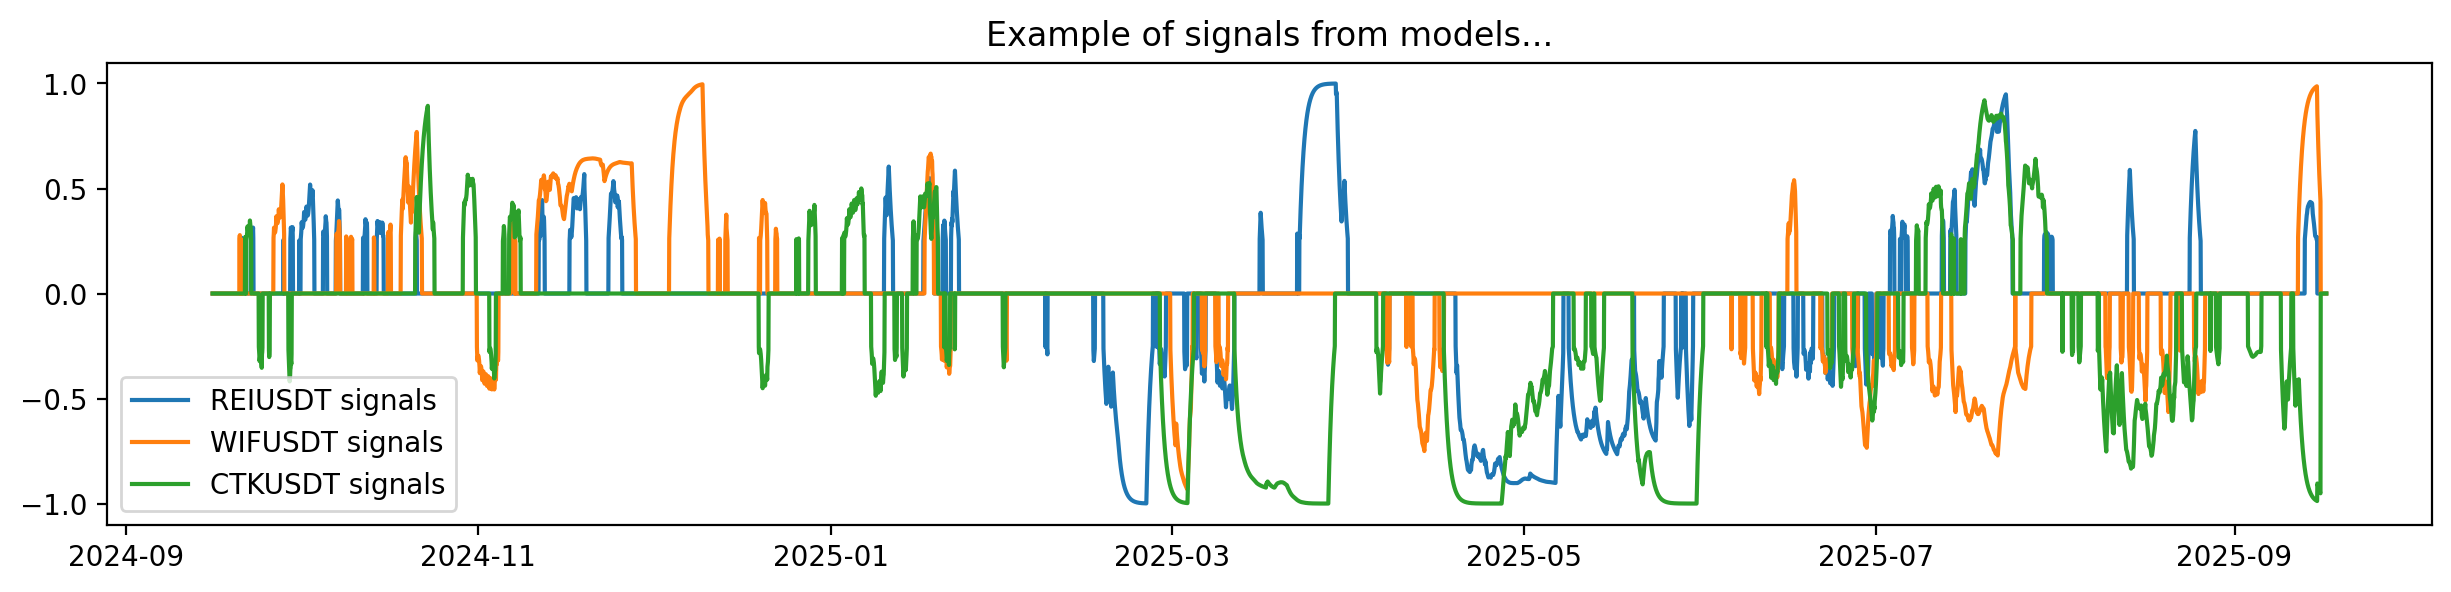

In [110]:
plt.figure(figsize = (15,3))
plt.title('Example of signals from models...')
for c in list(signals.keys())[:3]:
    plt.plot(signals.get(c),label = f'{c} signals')
plt.legend()
plt.show()

In [108]:
# SIGNAL-MV
eq_sig, det_sig = portfolio_equity_dynamic_v3(
    prices, tw_sig, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,

    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)

# Equal Weight / MV / RP
tw_eqM = equal_weight_targets(prices, freq="M")
tw_mvM = mv_targets(prices, lookback=60, max_w=0.4, freq="M")
tw_rpM = risk_parity_targets(prices, lookback=60, freq="M")

band_ts = bands_from_vol(prices, span=20, base_bps=40, k_vol=150)

eq_eq, det_eq = portfolio_equity_dynamic_v3(
    prices, tw_eqM, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)
eq_mv, det_mv = portfolio_equity_dynamic_v3(
    prices, tw_mvM, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)
eq_rp, det_rp = portfolio_equity_dynamic_v3(
    prices, tw_rpM, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)


In [112]:
def plot_equity_panel(curves: dict[str, pd.Series], normalize=True, last_n=None, title="Dynamic Rebalancing — Equity"):
    plt.figure(figsize=(15,4))
    for name, eq in curves.items():
        s = eq if last_n is None else eq.iloc[-last_n:]
        if normalize and len(s):
            s = s / s.iloc[0]
        s.plot(lw=1.5, label=name)
    plt.title(title); plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


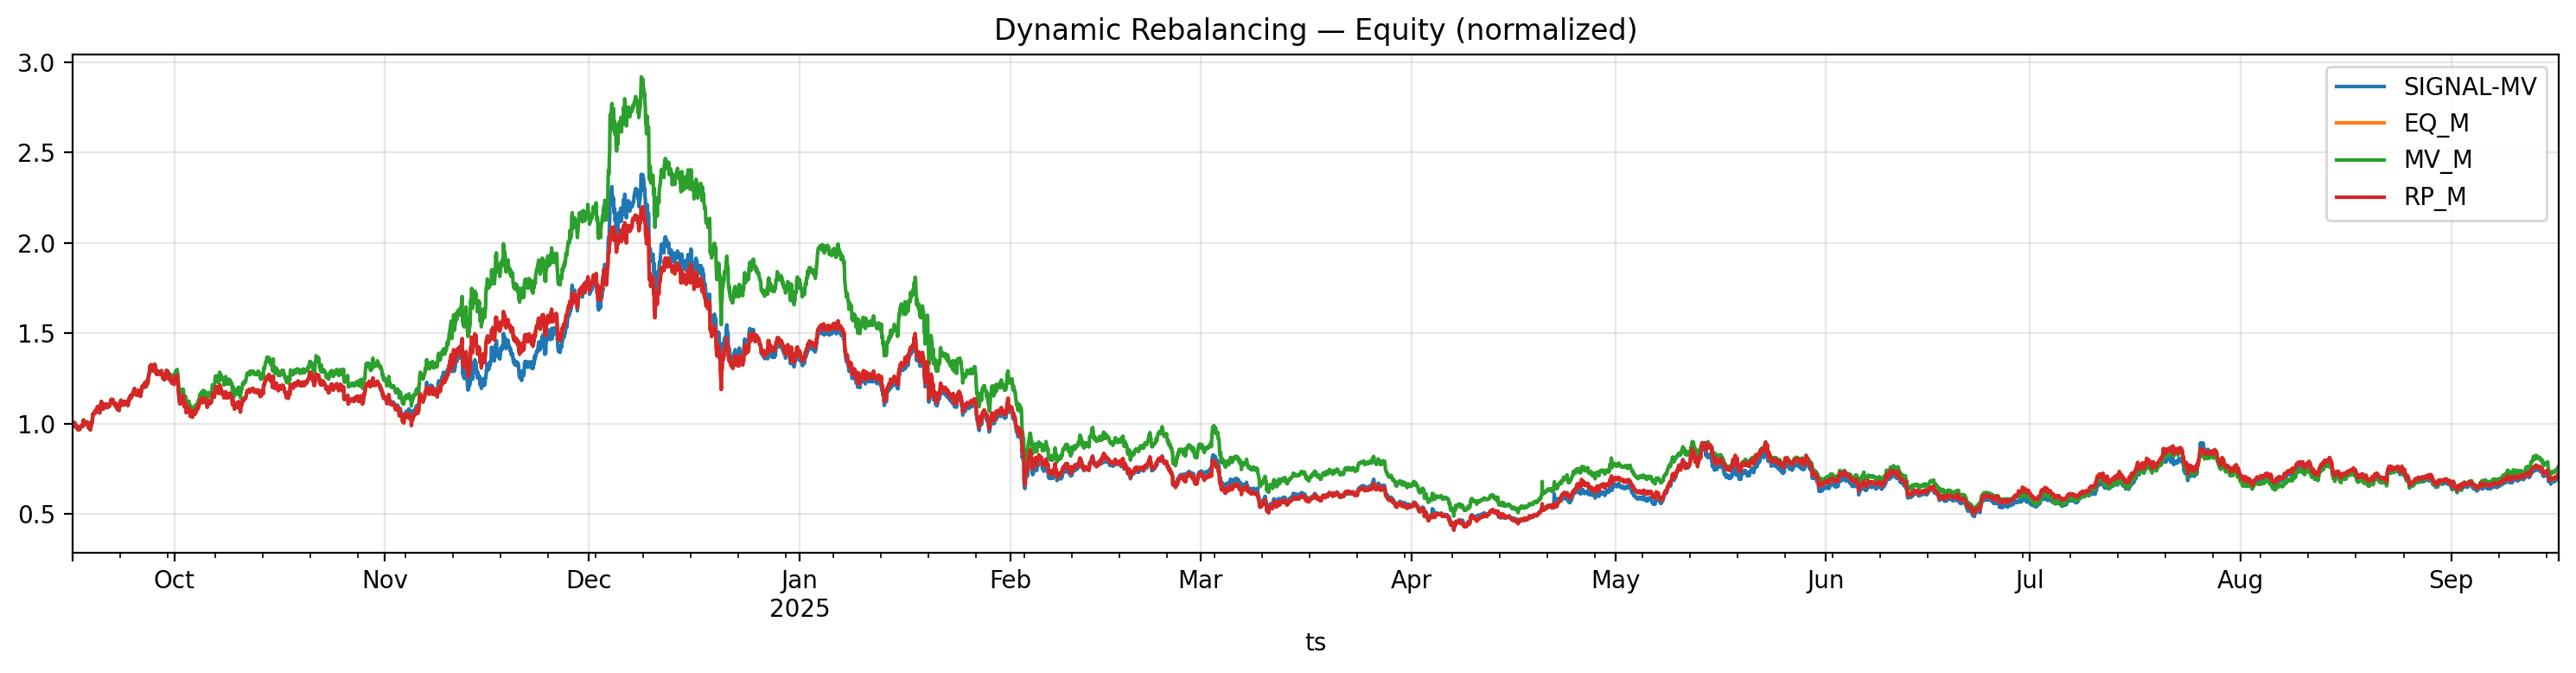

In [113]:
plot_equity_panel({
    "SIGNAL-MV": eq_sig,
    "EQ_M":      eq_eq,
    "MV_M":      eq_mv,
    "RP_M":      eq_rp,
}, normalize=True, last_n=None, title="Dynamic Rebalancing — Equity (normalized)")


In time perspective

### Part 5: portfolio expansion


*Use more coins then in part 4*

In [114]:
# wide portfolio
prices = wide_tb[wide_tb.index>=split_date][vol_df.index[:20]].copy() 
curves, summary = run_dynamic_demo(prices, lookback=60, max_w=0.4, fee_bps=5.0)
print(summary)


                 CAGR  Sharpe   MaxDD  FinalEq
MV_M_dynBands -0.0627  0.4060 -0.7427   0.9371
EQ_M_dynBands -0.1735  0.2585 -0.7375   0.8261
EQ_M_monthly  -0.2092  0.2128 -0.7340   0.7904
EQ_M_50bps    -0.2092  0.2128 -0.7340   0.7904


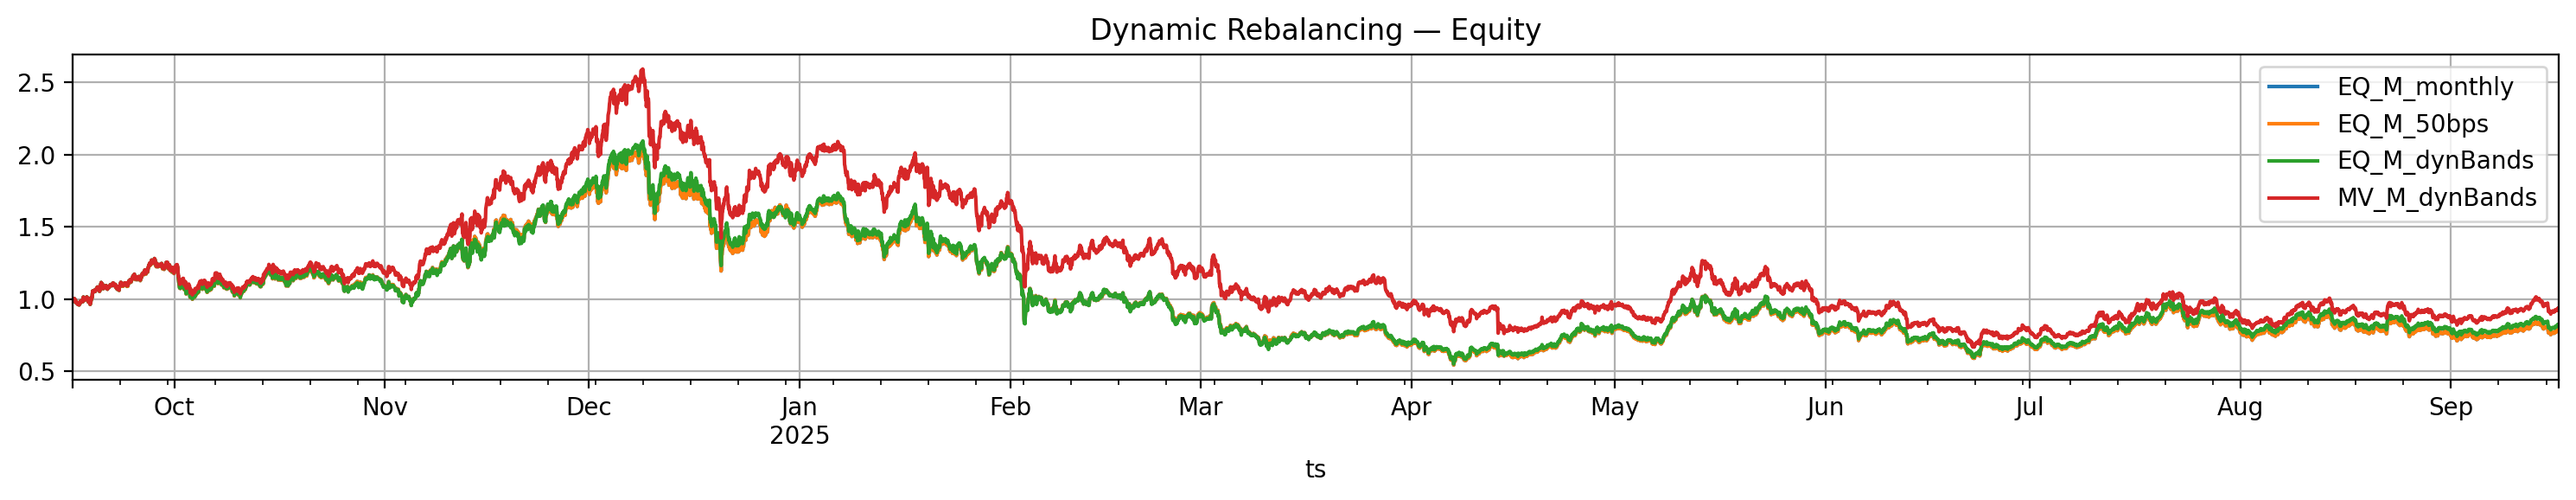

EQ_M_dynBands: {'CAGR': -0.1735, 'Sharpe': 0.2585, 'MaxDD': -0.7375, 'FinalEq': 0.8261}
MV_M_dynBands: {'CAGR': -0.0627, 'Sharpe': 0.406, 'MaxDD': -0.7427, 'FinalEq': 0.9371}


In [115]:
plt.figure(figsize=(15,3))
for name, eq in curves.items():
    eq.plot(label=name)
plt.title("Dynamic Rebalancing — Equity")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()


tw_eqM = equal_weight_targets(prices, freq='M')
tw_mvM = mv_targets(prices, lookback=60, max_w=0.4, freq='M')
band_ts = bands_from_vol(prices, span=20, base_bps=40, k_vol=150)

eq_eq_bands = portfolio_equity_dynamic_v3(prices, tw_eqM, band_bps_ts=band_ts, fee_bps=5.0, max_turnover=0.25)
eq_mv_bands = portfolio_equity_dynamic_v3(prices, tw_mvM, band_bps_ts=band_ts, fee_bps=5.0, max_turnover=0.25)

print("EQ_M_dynBands:", brief_report(eq_eq_bands).round(4).to_dict())
print("MV_M_dynBands:", brief_report(eq_mv_bands).round(4).to_dict())


#### **MV_M_dynBands** repabans show best avg results on choosing TS period

In [116]:
signals = build_suite_signals_for_all_assets(prices)


tw_sig = signal_mv_targets(
    prices, signals,
    lookback=60, freq="M",
    gate_abs=0.25,    
    long_only=True,   
    max_w=0.15
)

band_ts = bands_from_vol(prices, span=20, base_bps=40, k_vol=150)
eq_sig  = portfolio_equity_dynamic_v3(
    prices, tw_sig, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
)

print("SIGNAL-MV:", brief_report(eq_sig).round(4).to_dict())


SIGNAL-MV: {'CAGR': -0.2843, 'Sharpe': 0.1133, 'MaxDD': -0.7508, 'FinalEq': 0.7151}


In [117]:

eq_sig, det_sig = portfolio_equity_dynamic_v3(
    prices, tw_sig, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)


tw_eqM = equal_weight_targets(prices, freq="M")
tw_mvM = mv_targets(prices, lookback=60, max_w=0.4, freq="M")
tw_rpM = risk_parity_targets(prices, lookback=60, freq="M")

band_ts = bands_from_vol(prices, span=20, base_bps=40, k_vol=150)

eq_eq, det_eq = portfolio_equity_dynamic_v3(
    prices, tw_eqM, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)
eq_mv, det_mv = portfolio_equity_dynamic_v3(
    prices, tw_mvM, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)
eq_rp, det_rp = portfolio_equity_dynamic_v3(
    prices, tw_rpM, band_bps_ts=band_ts,
    fee_bps=5.0, max_turnover=0.25,
    min_trade_bps=5.0, per_asset_band_bps=10.0,
    return_details=True
)

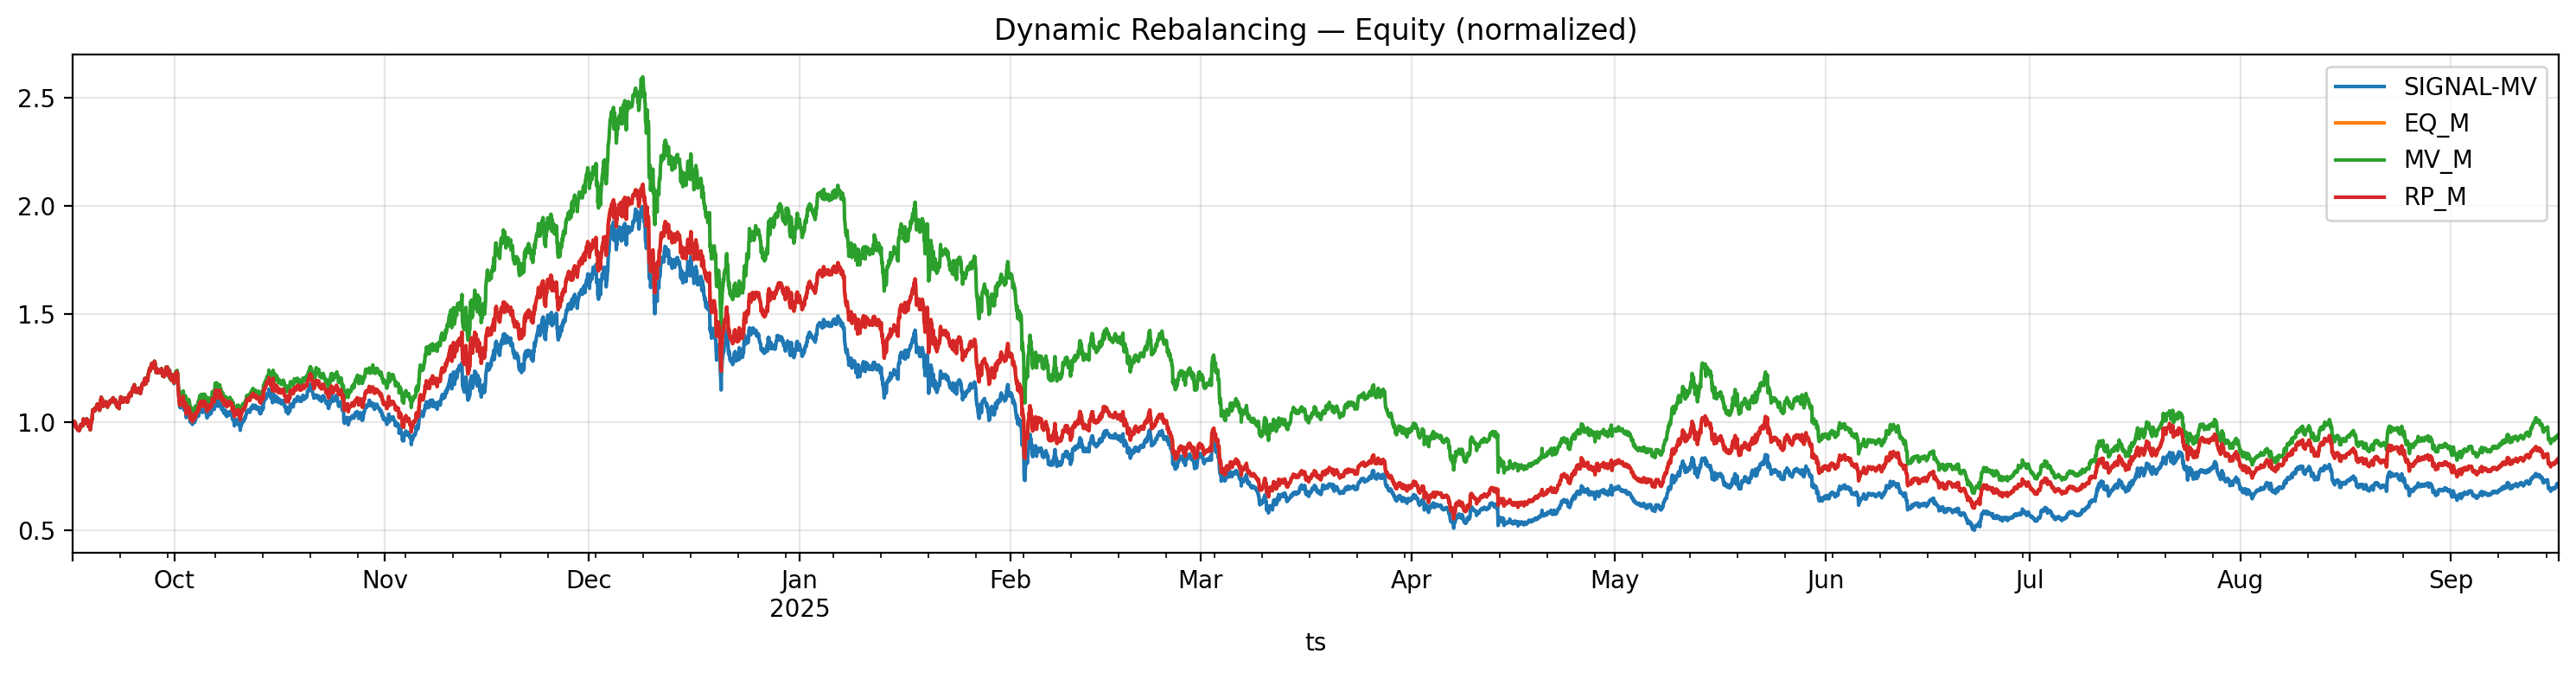

In [118]:
plot_equity_panel({
    "SIGNAL-MV": eq_sig,
    "EQ_M":      eq_eq,
    "MV_M":      eq_mv,
    "RP_M":      eq_rp,
}, normalize=True, last_n=None, title="Dynamic Rebalancing — Equity (normalized)")

#### **SIGNAL-MV** repabans show best avg results on choosing TS period

**Comments section for part 5:**

1. Selection of Trading Pairs: Based on liquidity, correlation, historical stats

2. Prioritization of Signals: Weighted by confidence, past performance, and correlation penalties.

3. Risk Management: Dedicated risk agent monitoring Vol, VaR, MaxDD, liquidity.

4. Portfolio Management: AI-driven dynamic rebalancing (time, threshold, signal-based).

5. For System Monitoring we can use PnL (monitor data quality, latency, model drift, slippage)

6. For Long-Term Quality Tracking: Continuous backtesting, rolling OOS validation, feature/model drift checks.

7. Fail-Safes Stop Signals:

- Kill-switch on portfolio MDD breach.

- Liquidity/volatility filters.

- Fallback to passive baseline if agents behave abnormally.